# Analyse des résultats

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10, 7]

Chargement des données

In [8]:
path = "results_stat/nb_ite_1000"

# DataFrame
df = pd.read_csv(path)

# Files
files = df['file_name'].unique()

# Nombre d'itération
nb_ite = int(path[path.rfind("_")+1:])

# Alphas
alphas = [round(0.1*x, 2) for x in range(11)]

## BoxPlot

In [9]:
def show_plot_box(file):
    # Read best
    fdonnees = open(file, "r")
    optimum = int(fdonnees.readline().split()[2])
    fdonnees.close()
    
    # Create DataFrame with data from instance file
    df_file = df[df['file_name']==file]
    

    df_file.boxplot(by='alpha', grid=False, showfliers=False)
    plt.title("Fichier {}    |    Nombre d'itération = {}".format(file, nb_ite), fontdict={'fontsize':15})
    plt.suptitle("")
    
    # Plot min and max
    plt.scatter(np.linspace(1, 11, 11), df_file.groupby('alpha').min()['Cmax'], label='Min')
    plt.scatter(np.linspace(1, 11, 11), df_file.groupby('alpha').max()['Cmax'], label='Max')
    
    # Plot optimum
    plt.plot(np.linspace(1, 11, 11), [optimum for x in range(11)], 
             label = "Optimum = {}".format(optimum),
             linestyle="dashed",
             color="black")
    
    # Change labels
    plt.ylabel("Cmax")
    plt.xlabel('Alpha')
    
    # Change xticks with rounded values of alpha
    plt.xticks(np.linspace(1, 11, 11), alphas)
    
    # Limits of y-axis
    plt.ylim((optimum*0.7, df_file.groupby('alpha').max()['Cmax'].max()*1.1))
    
    # Show legends
    plt.legend()

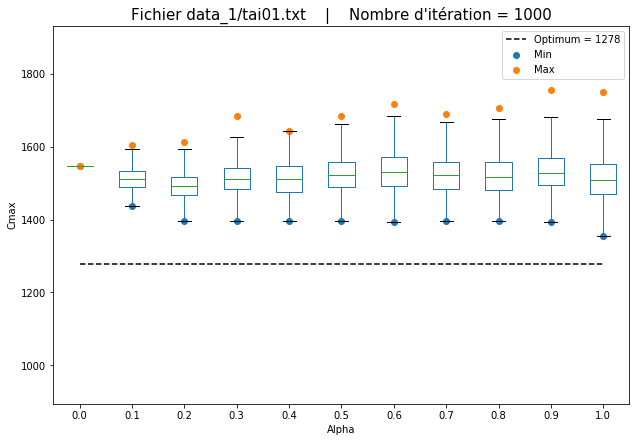

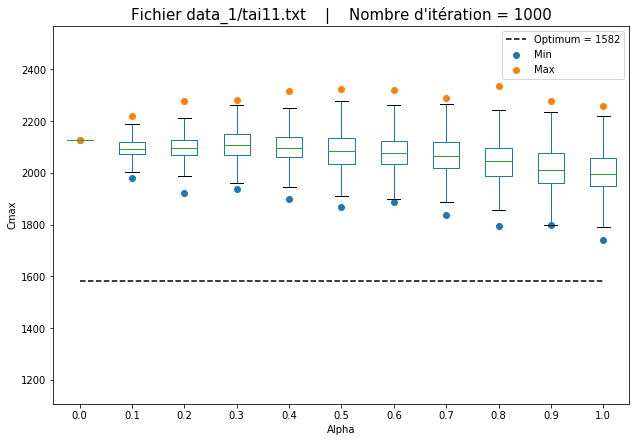

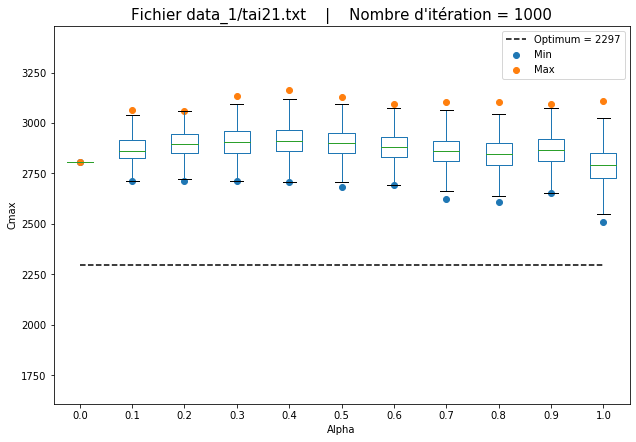

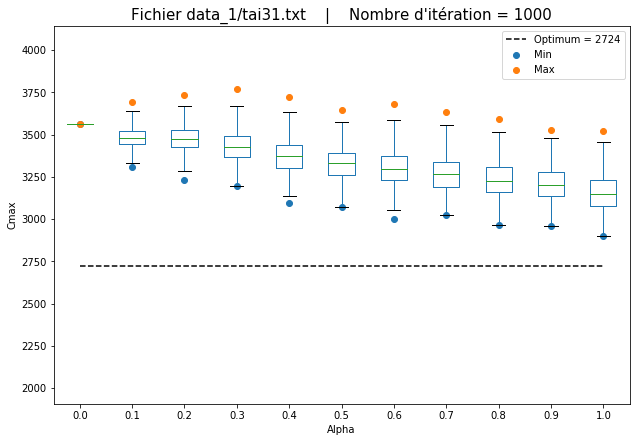

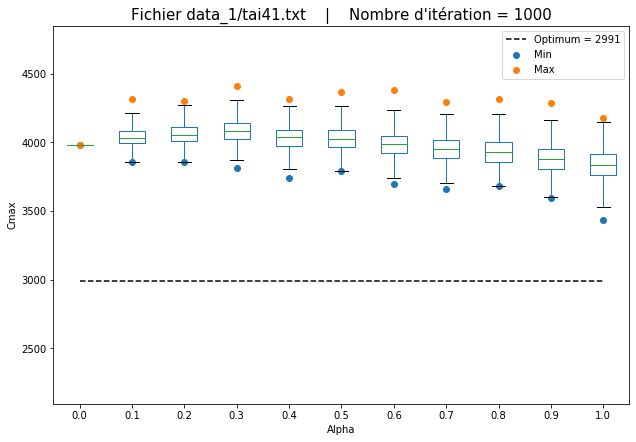

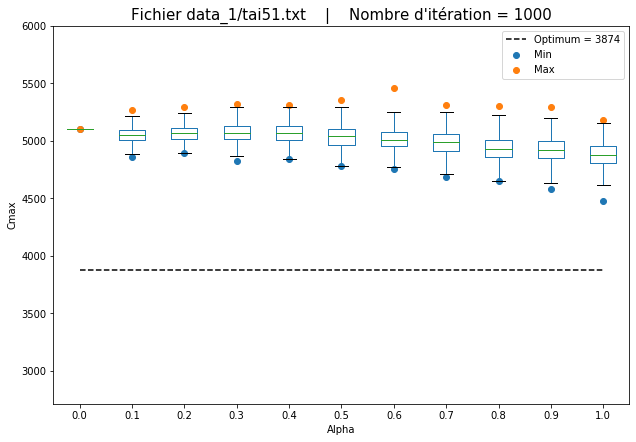

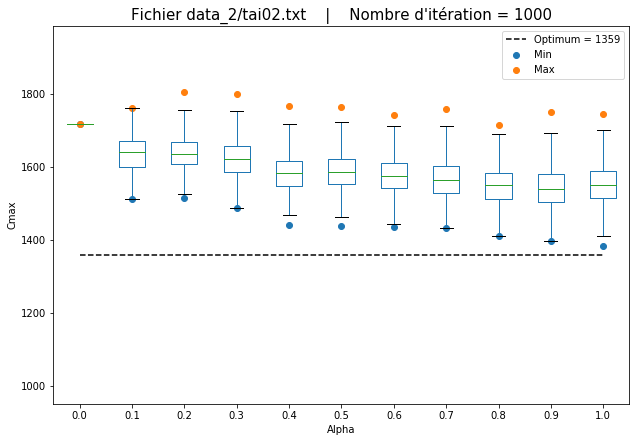

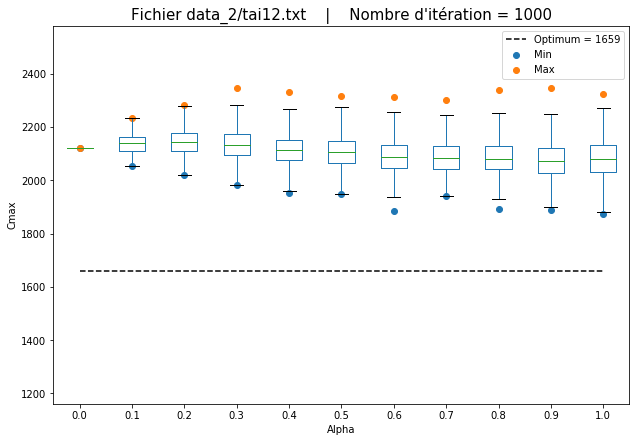

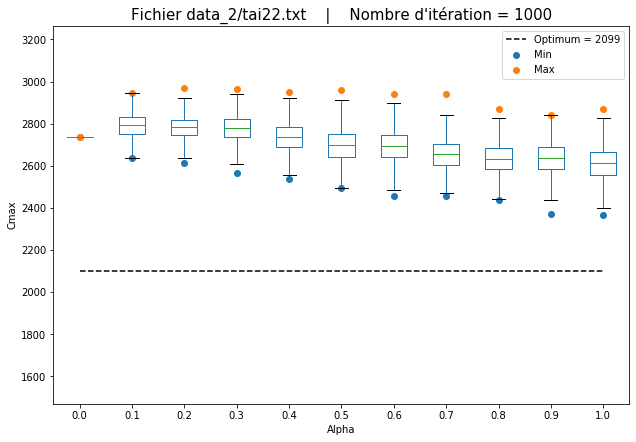

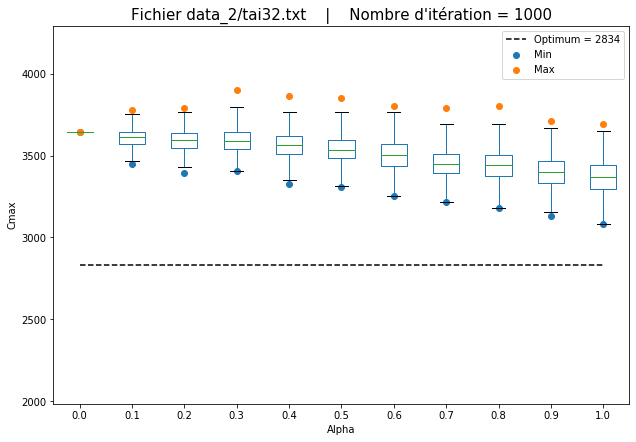

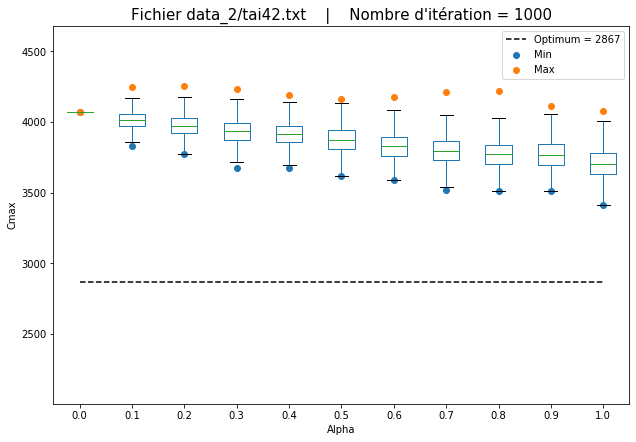

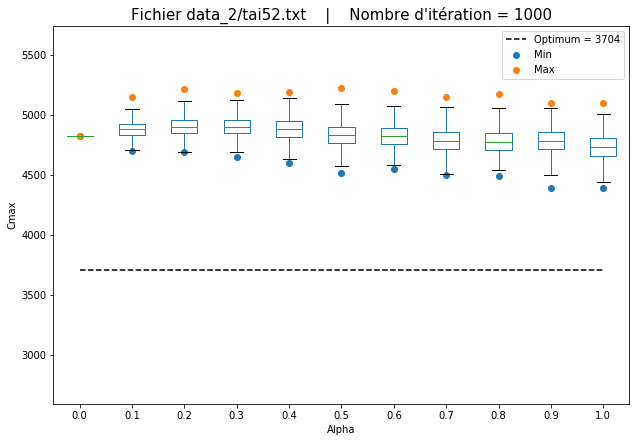

In [10]:
file = "data_1/tai01.txt"

for file in files:
    show_plot_box(file)

## Histogram

In [11]:
def show_hist(file):
    # Read best
    fdonnees = open(file, "r")
    optimum = int(fdonnees.readline().split()[2])
    fdonnees.close()
    
    # Create DataFrame with data from instance file
    df_file = df[df['file_name']==file]
    
    for alpha in df_file.alpha.unique():
        df_file[df_file['alpha']==alpha].hist('Cmax')
        plt.title("Fichier {}    |    Alpha = {}    |    Nombre d'itération = {}".format(file,
                                                                                         round(alpha, 2),
                                                                                         nb_ite), 
                  fontdict={'fontsize':15})
        plt.ylabel("occurrence", fontdict={'fontsize':15})
        plt.xlabel("Cmax", fontdict={'fontsize':15})
        
        plt.xlim((0.8*optimum, df_file[df_file['alpha']==alpha].Cmax.max()*1.1))
        
        # Plot vertical line for optimal value
        plt.axvline(x=optimum, color='r', linestyle='dashed', linewidth=2, label = "Optimum = {}".format(optimum))

/Users/gauthier/workspace/py_env/3_ML_DL/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


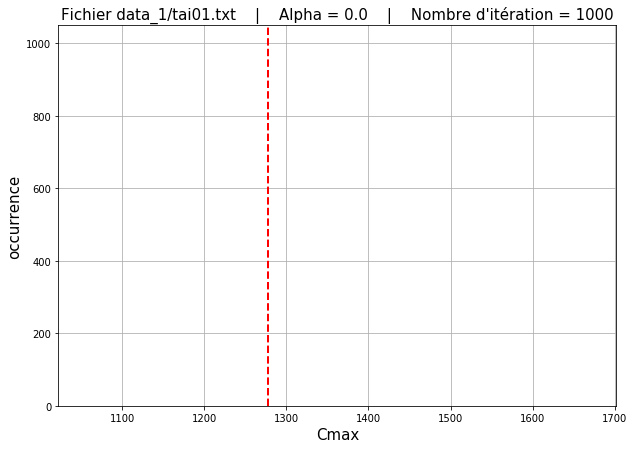

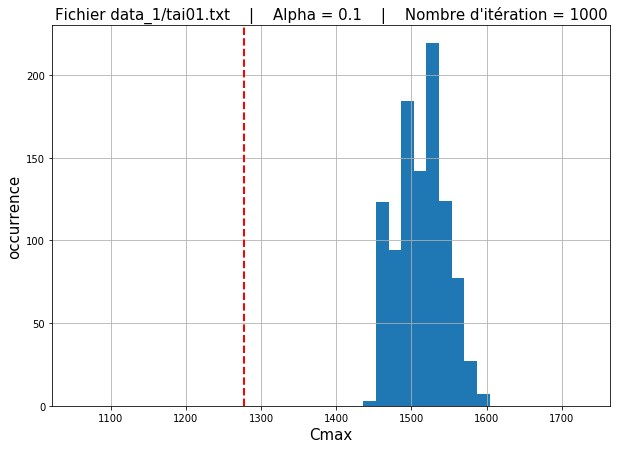

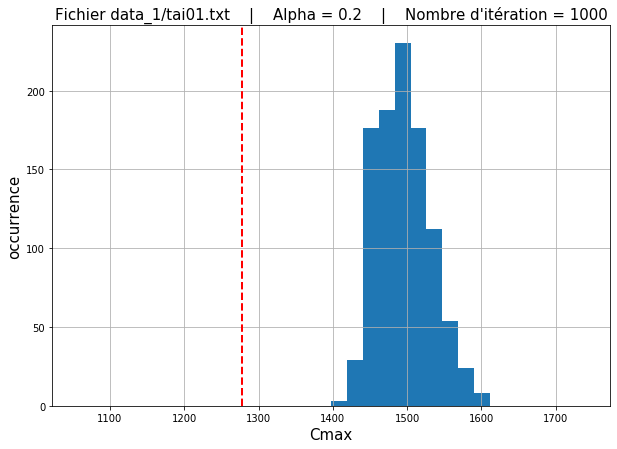

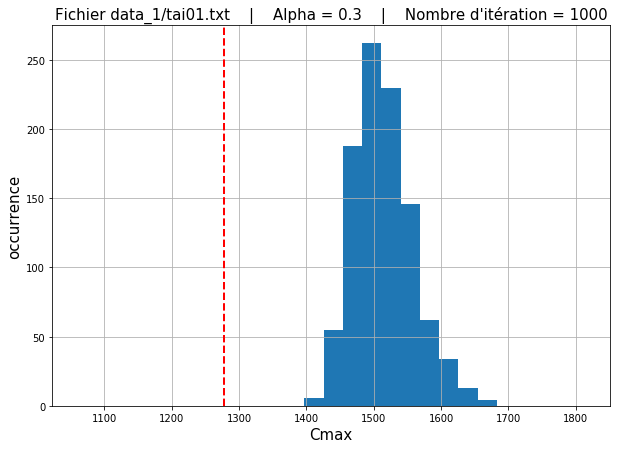

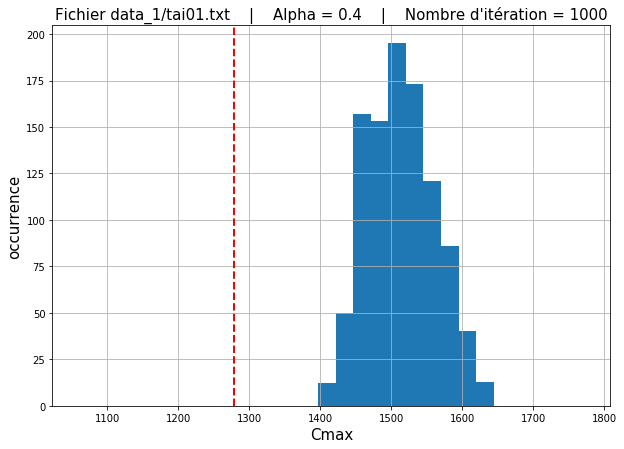

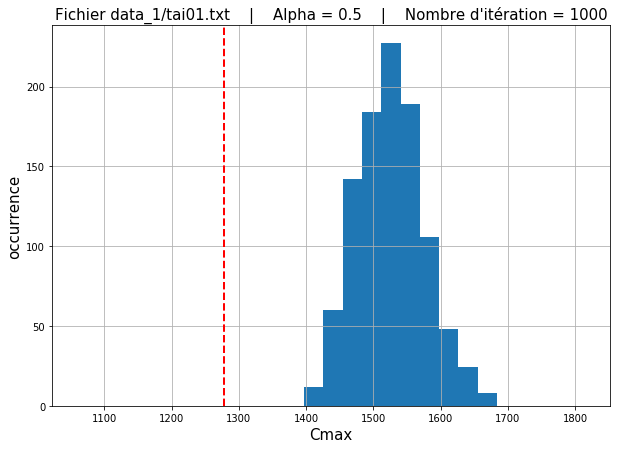

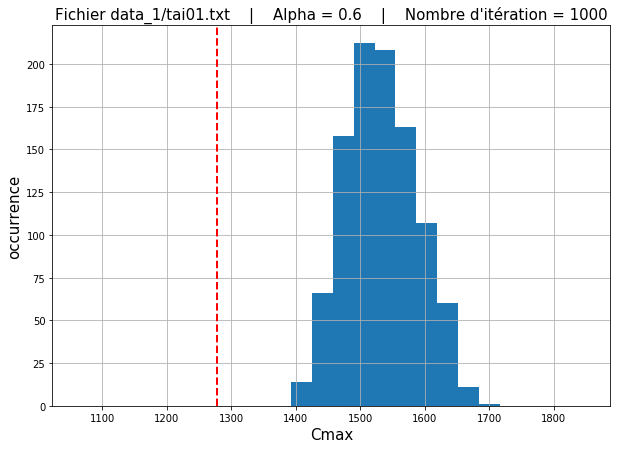

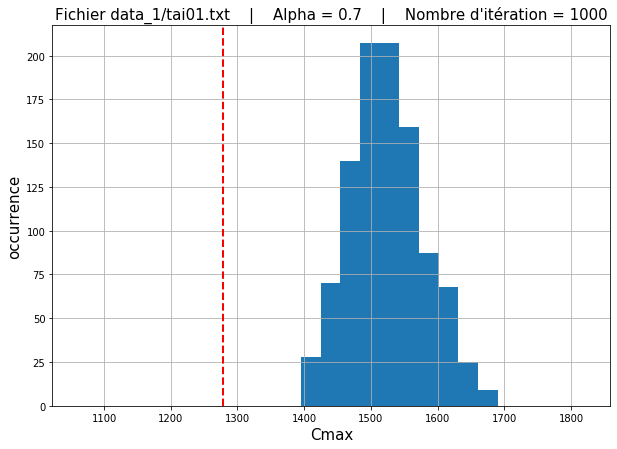

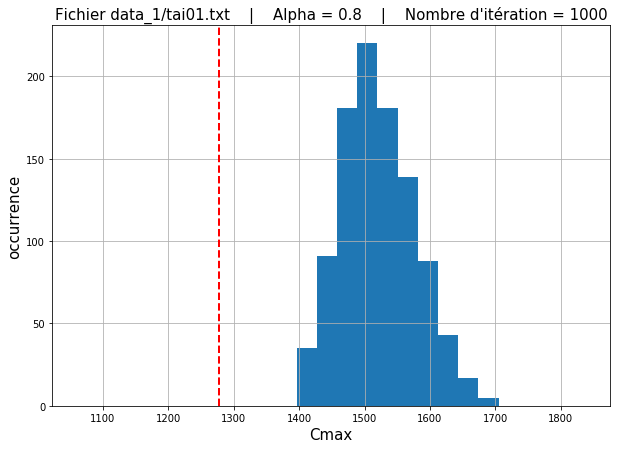

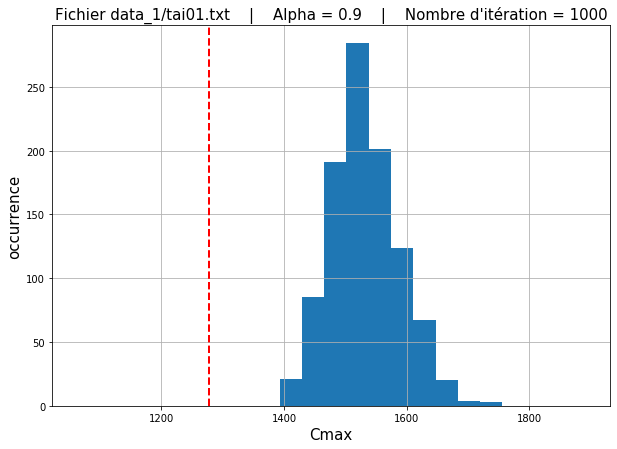

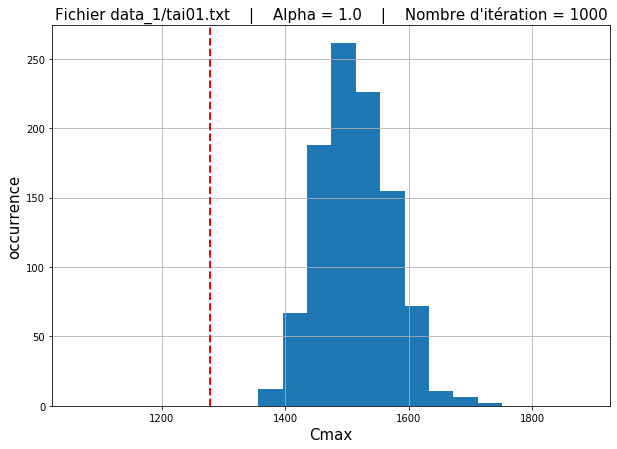

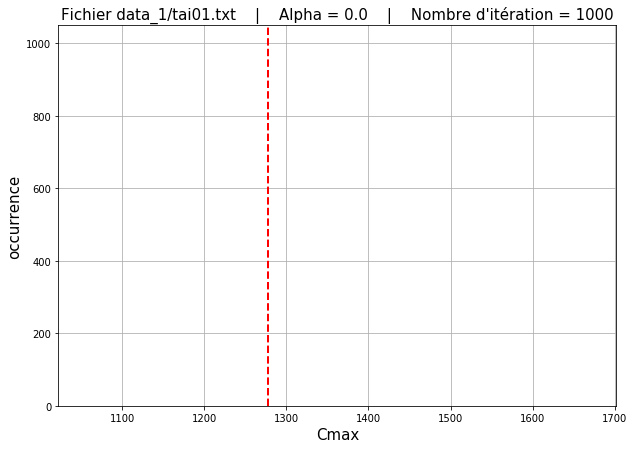

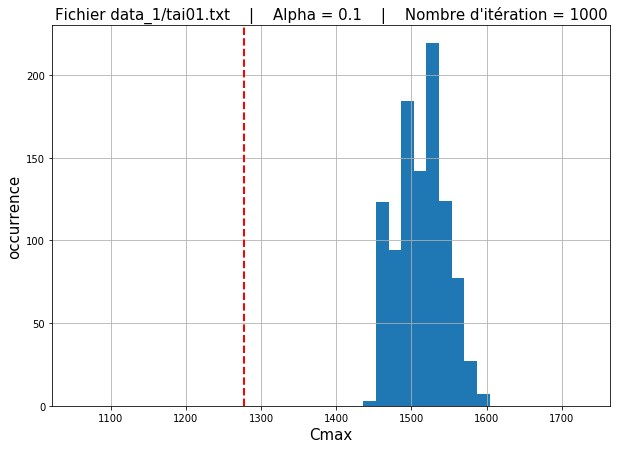

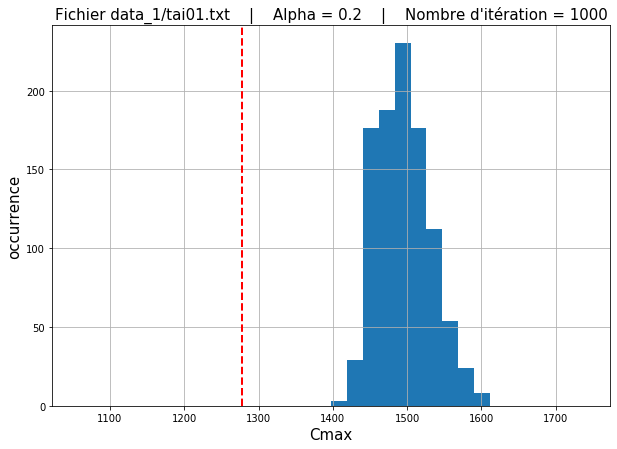

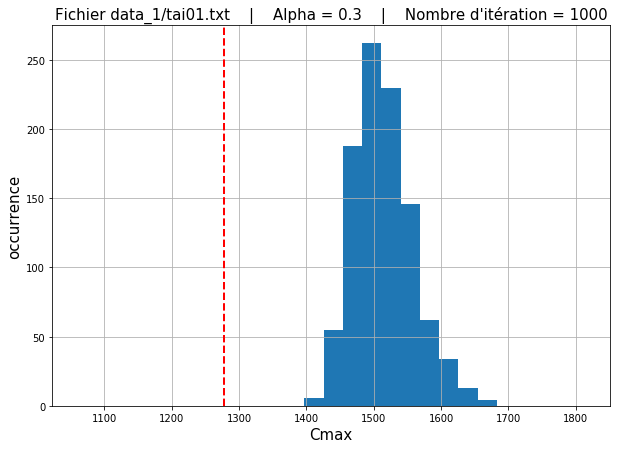

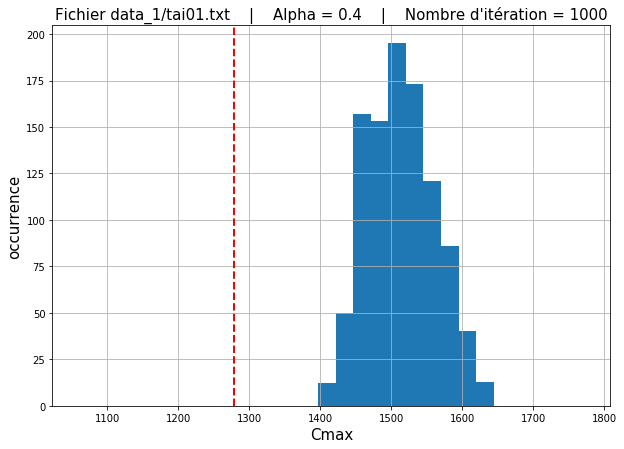

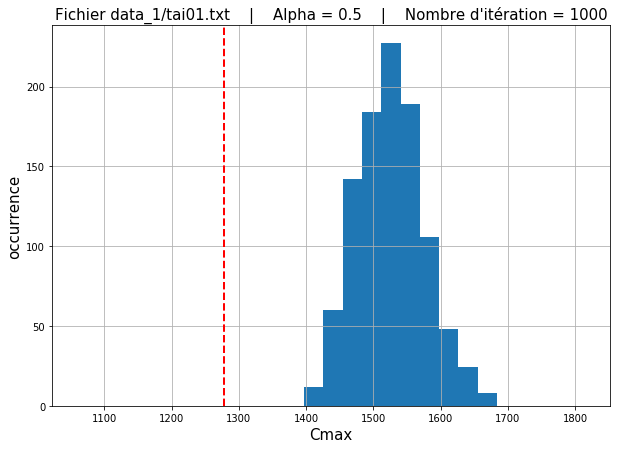

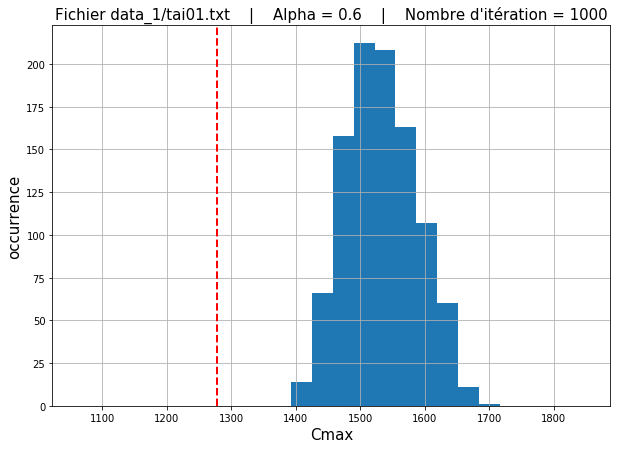

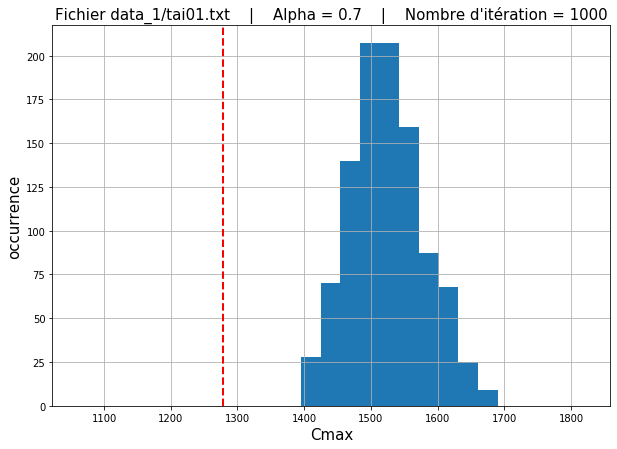

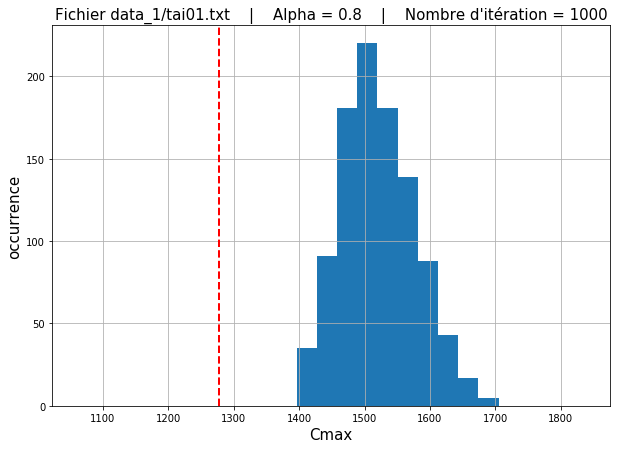

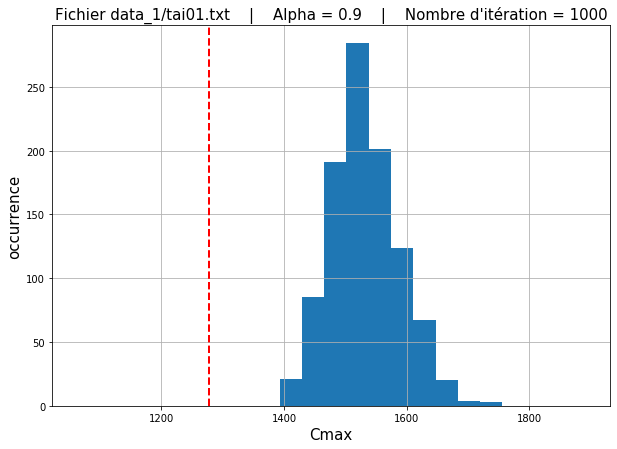

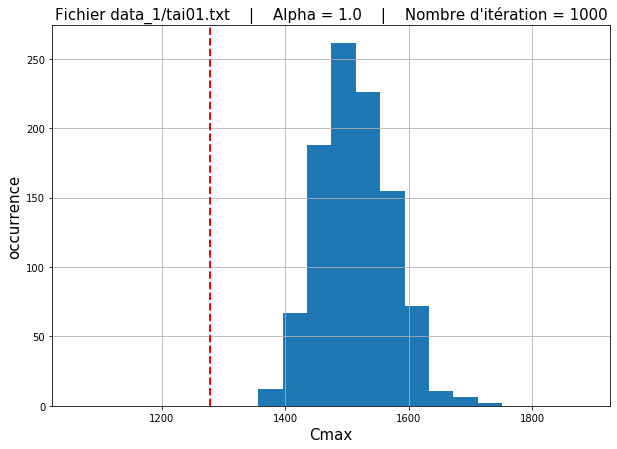

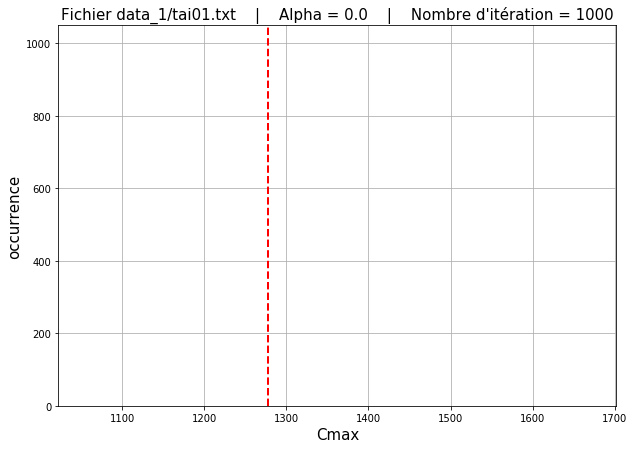

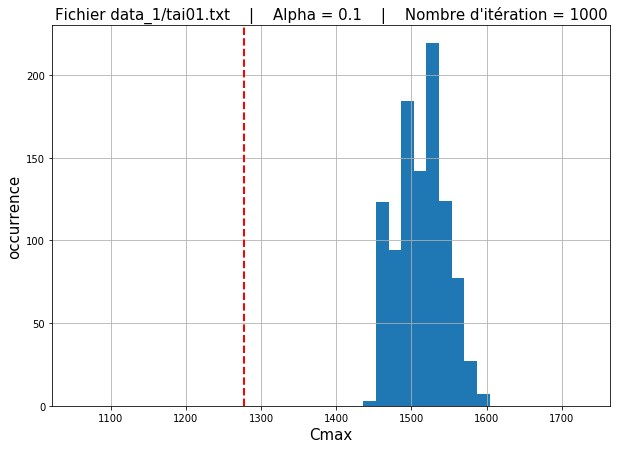

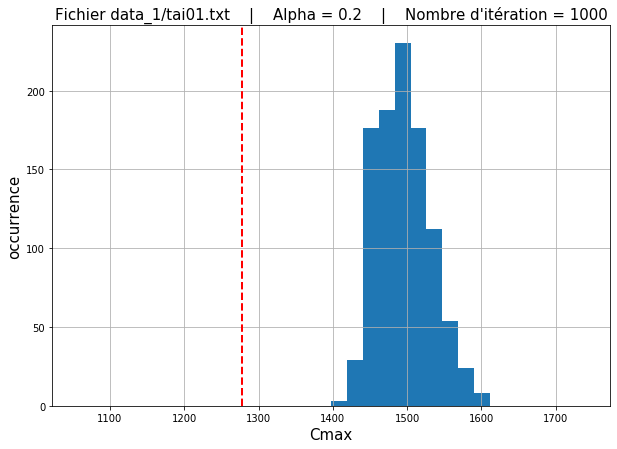

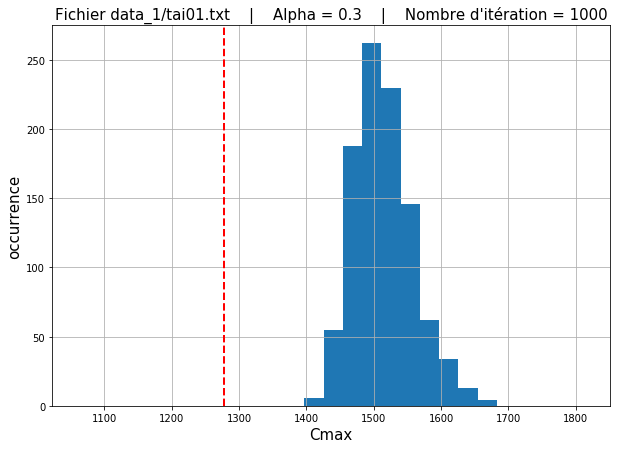

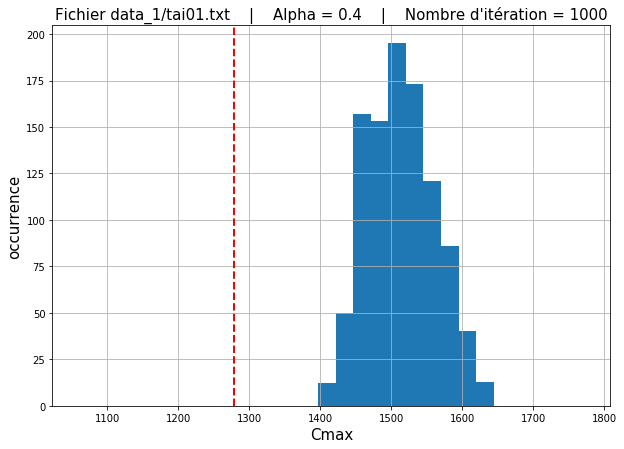

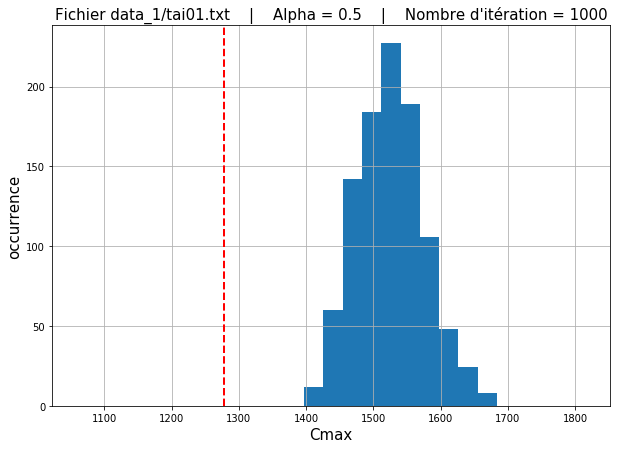

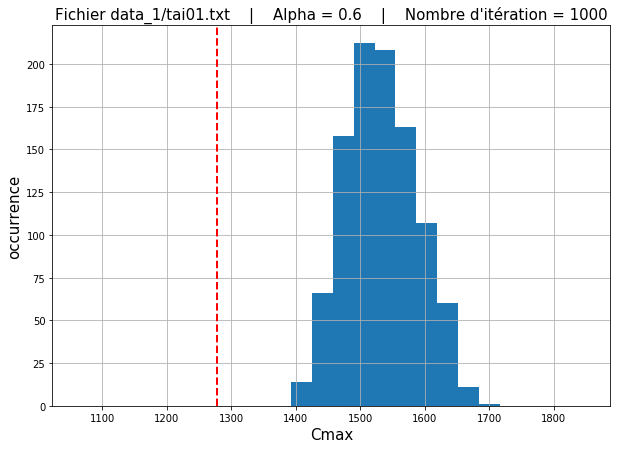

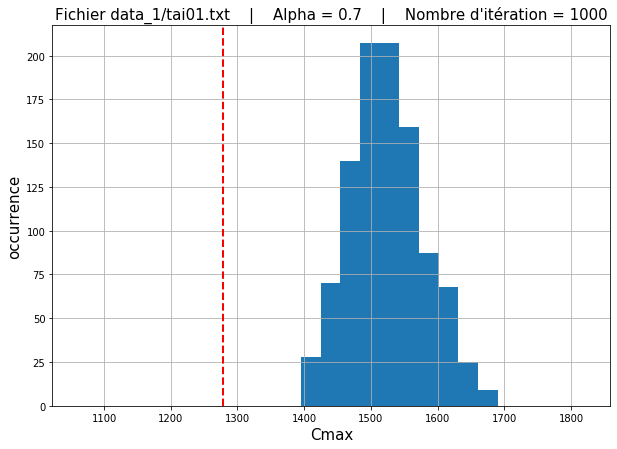

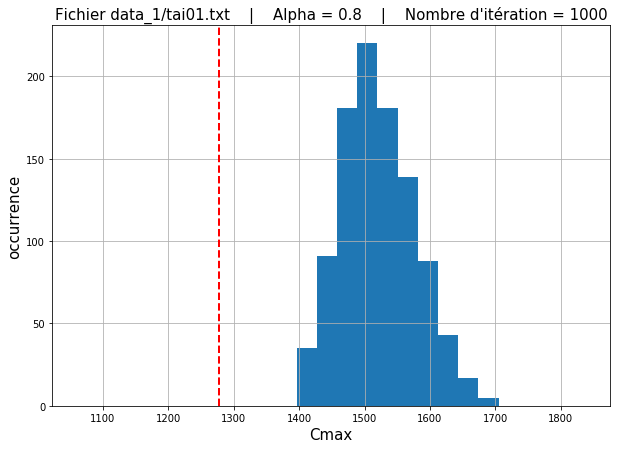

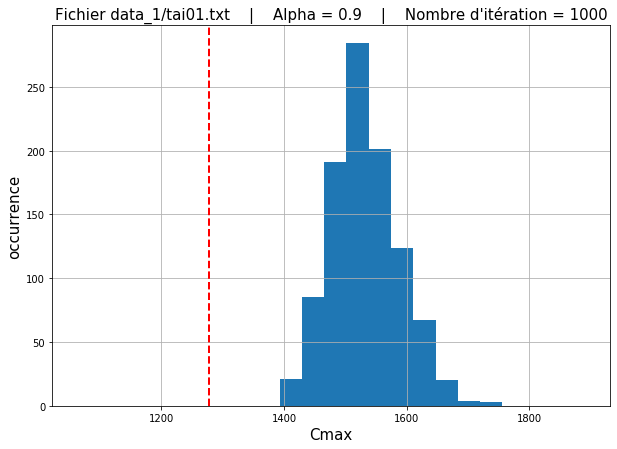

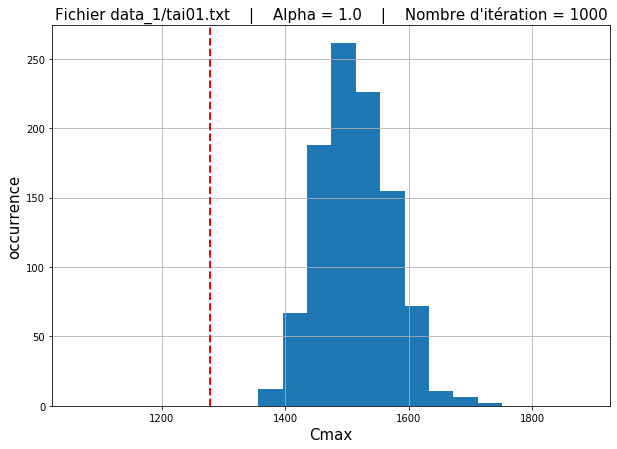

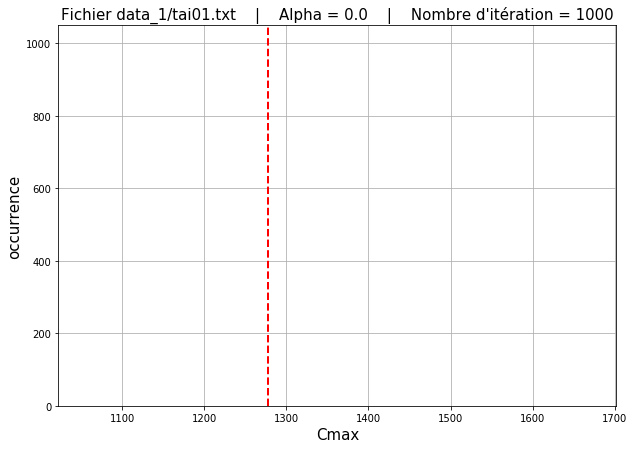

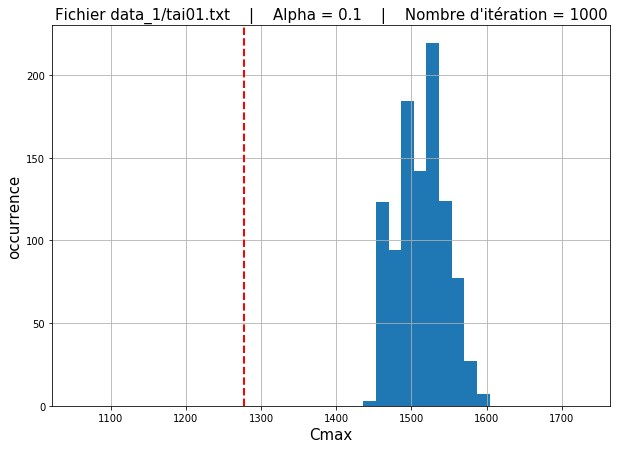

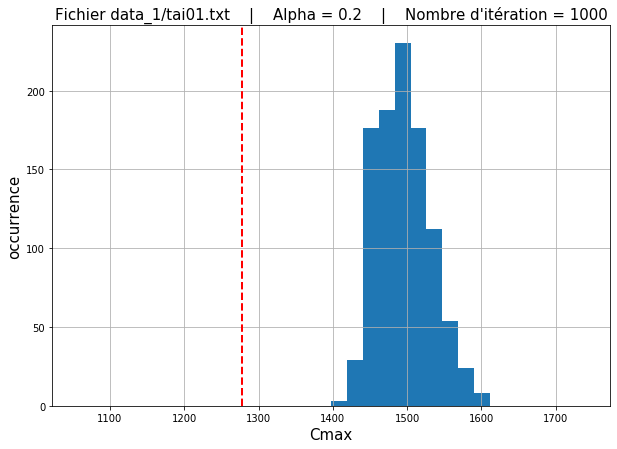

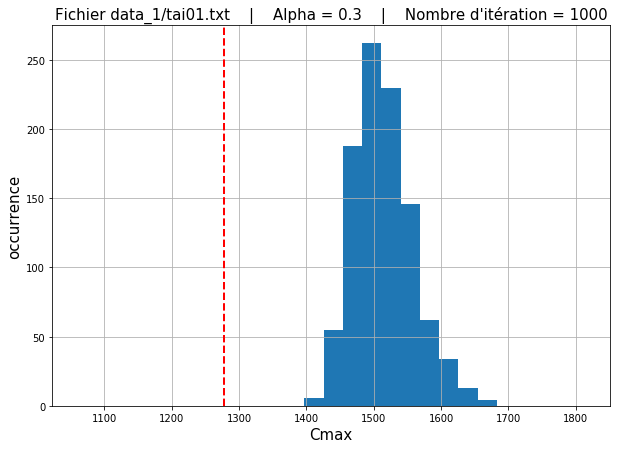

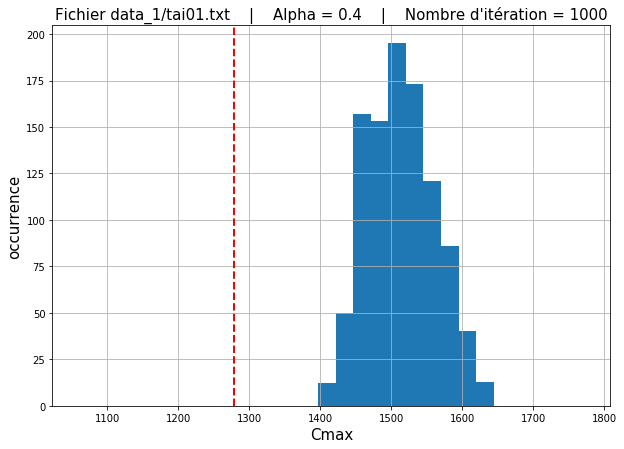

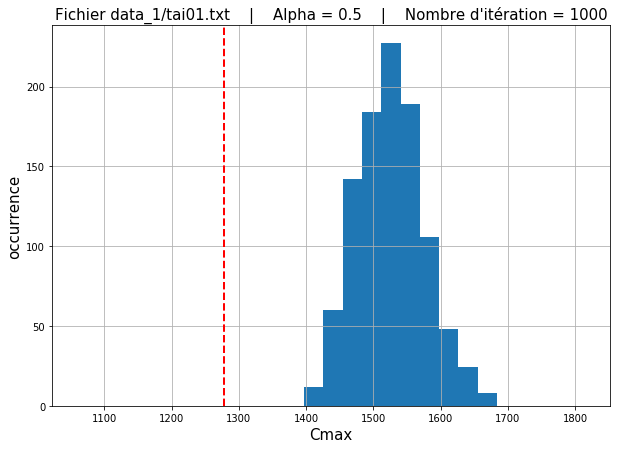

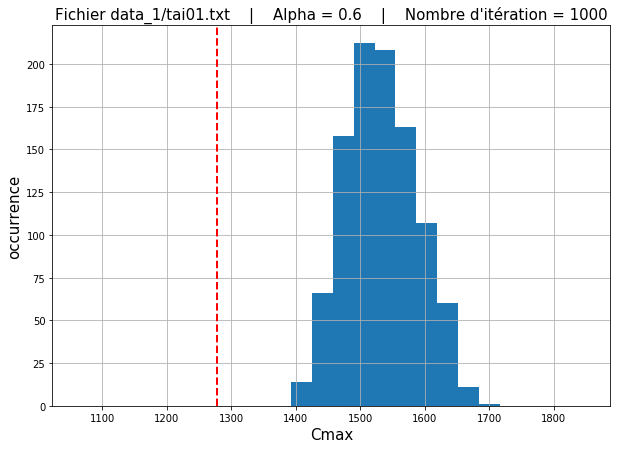

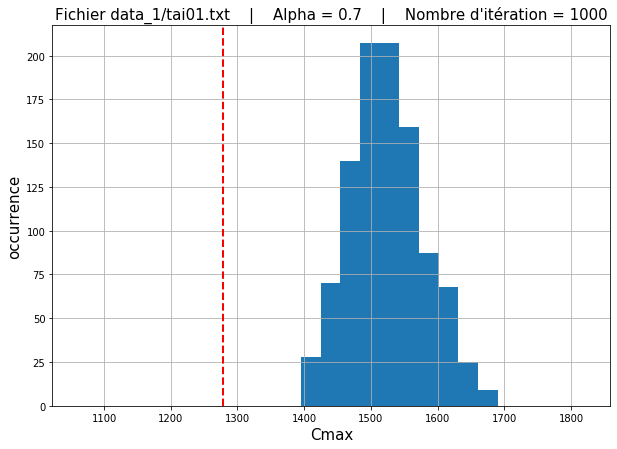

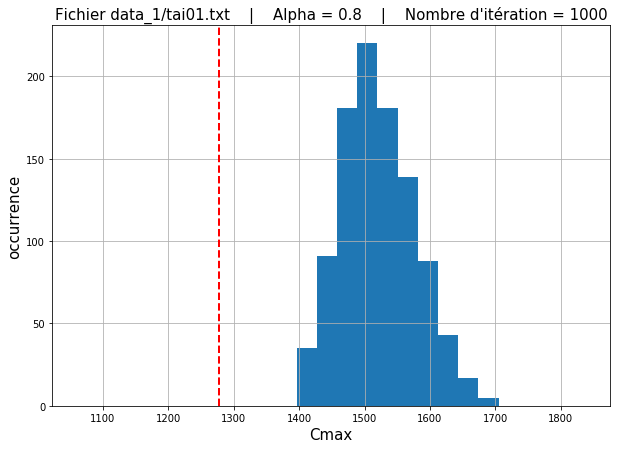

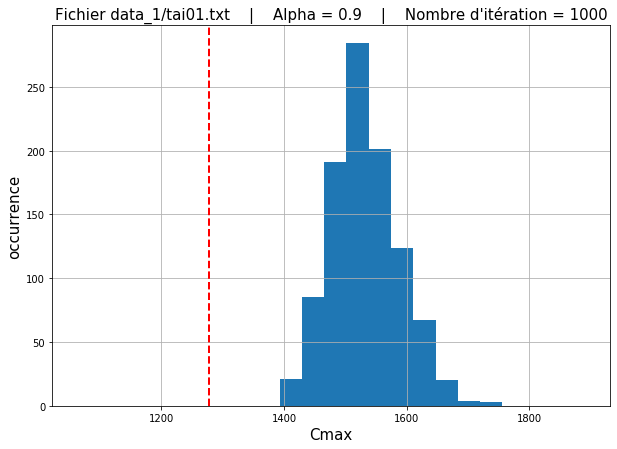

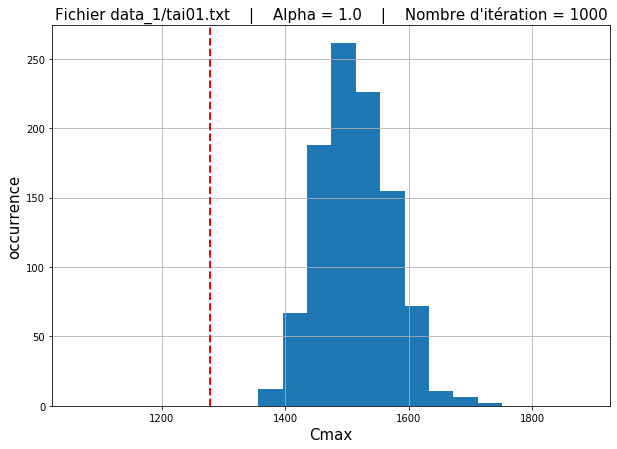

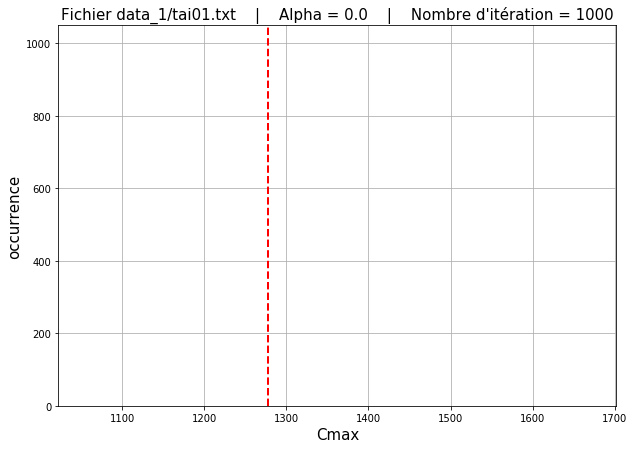

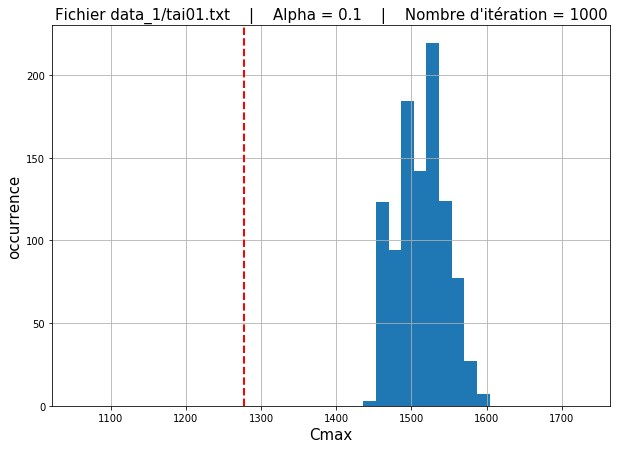

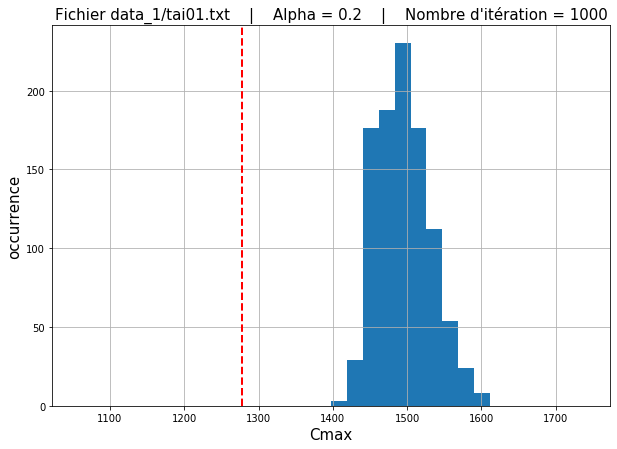

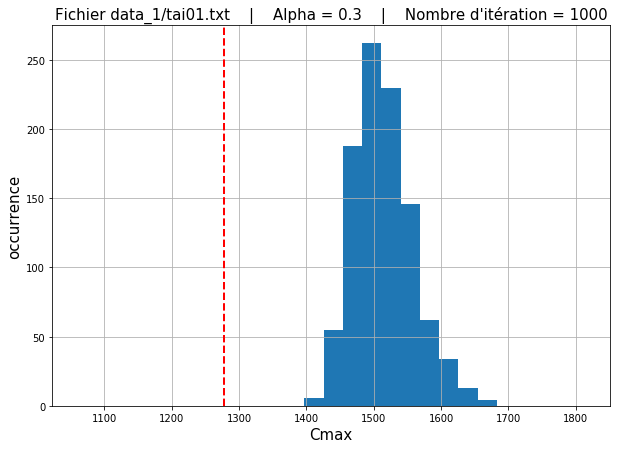

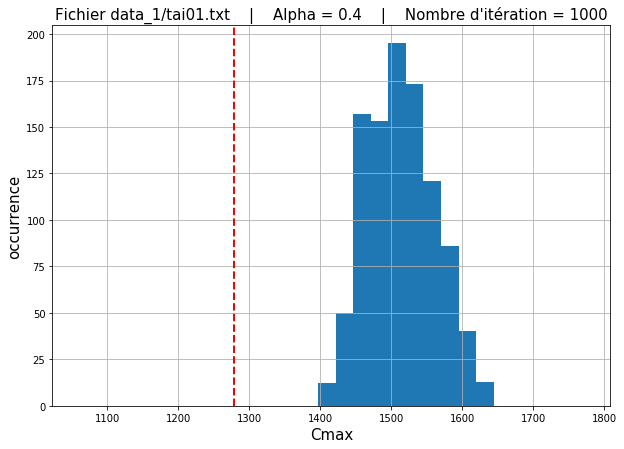

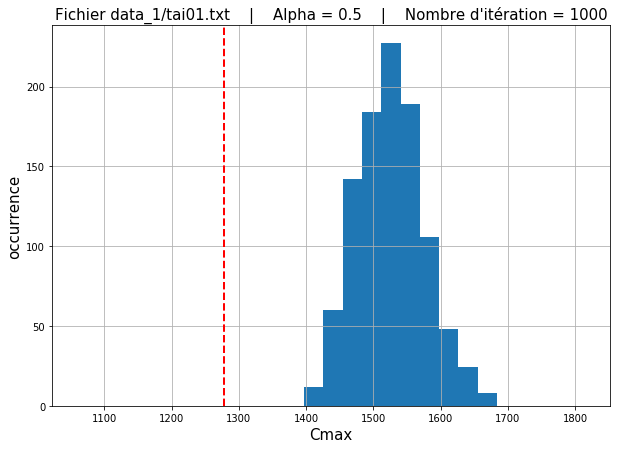

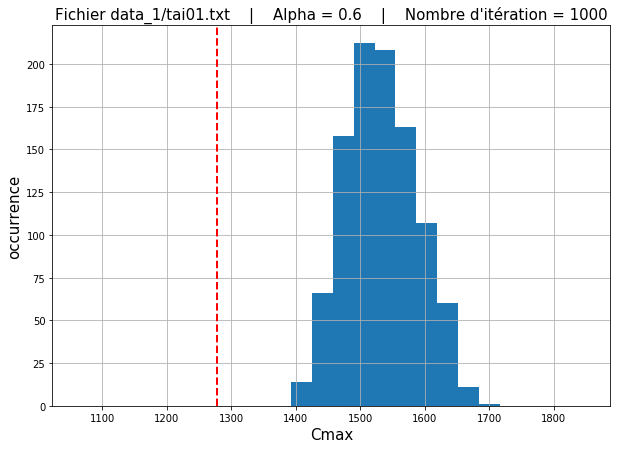

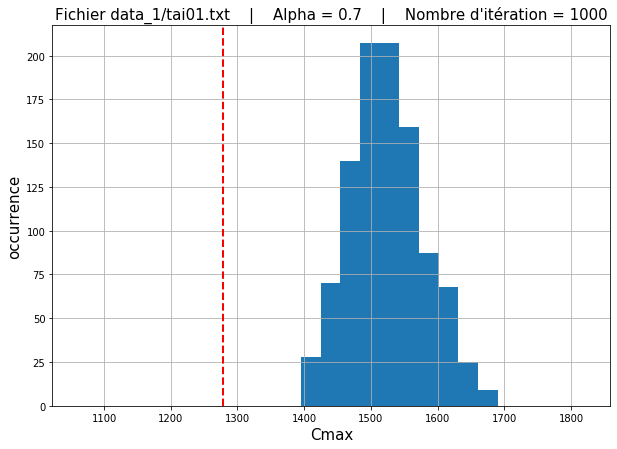

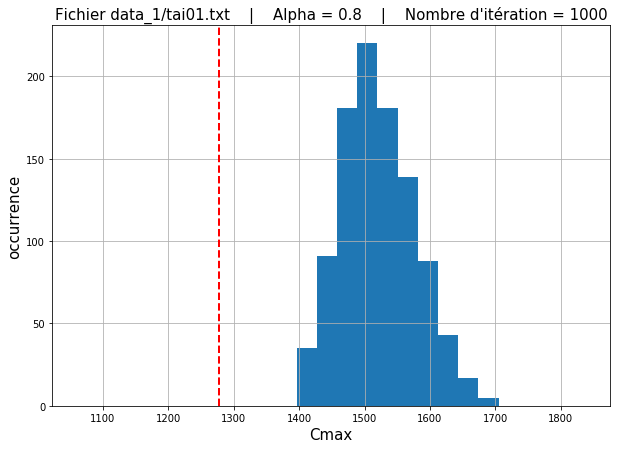

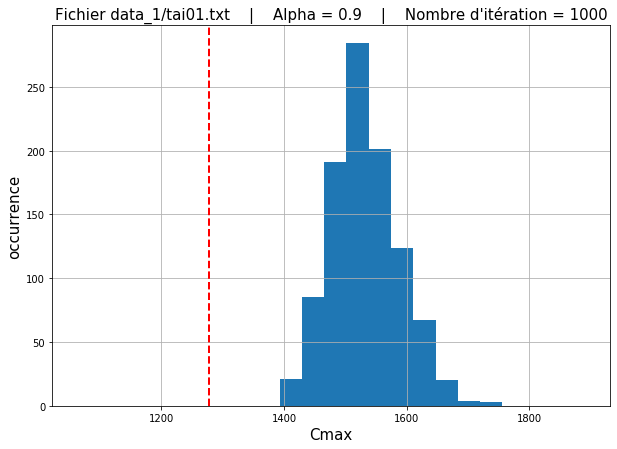

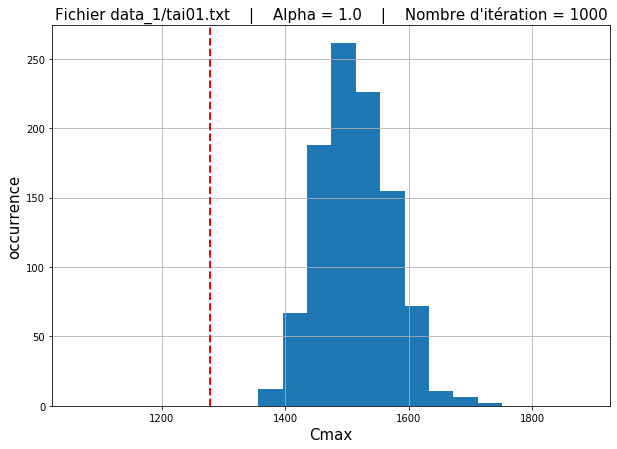

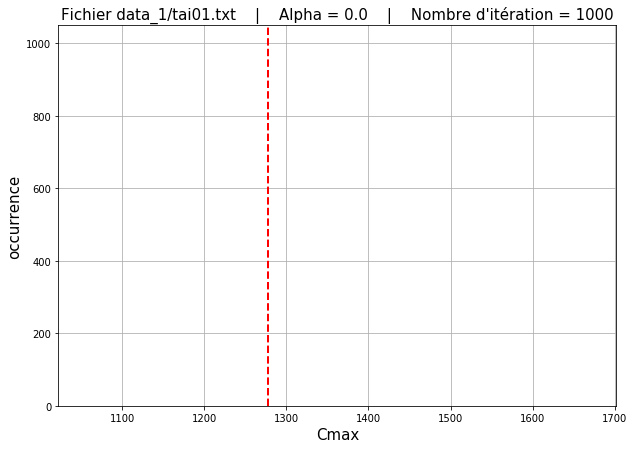

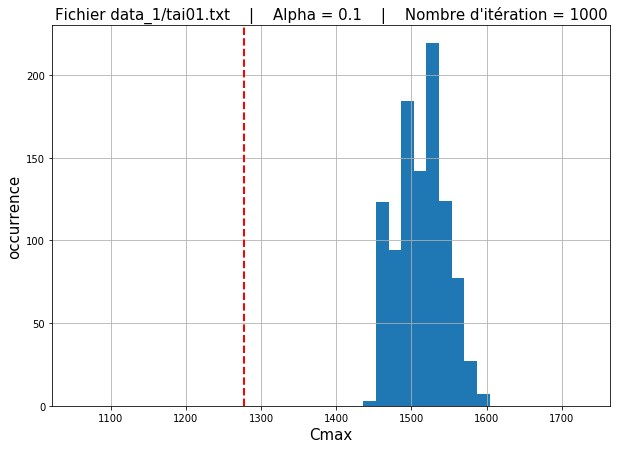

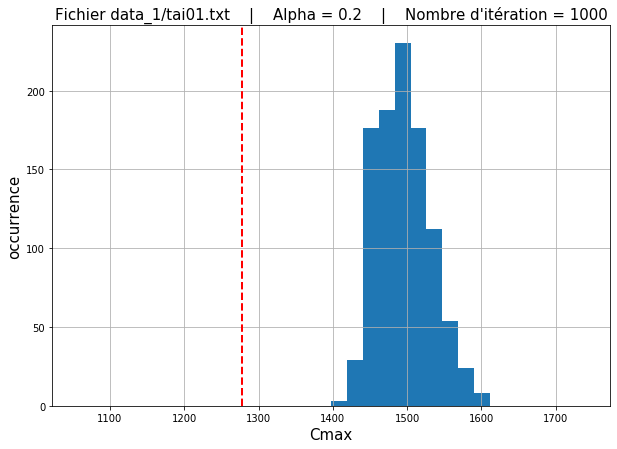

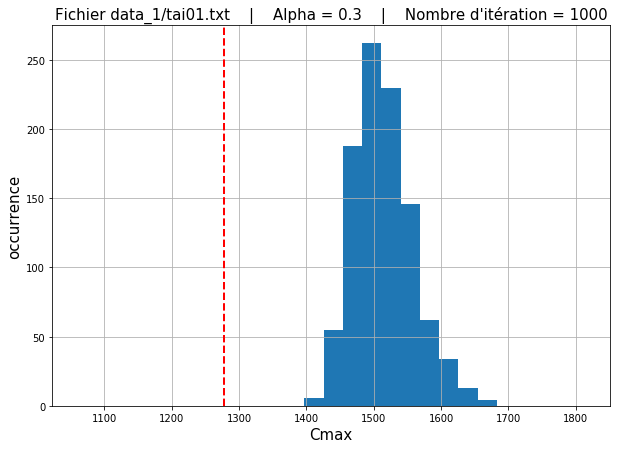

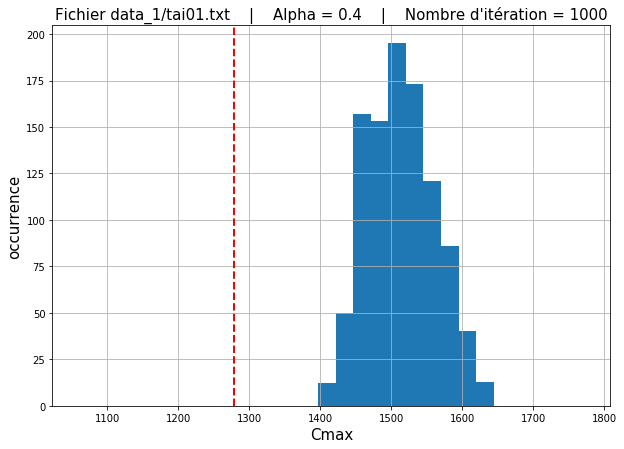

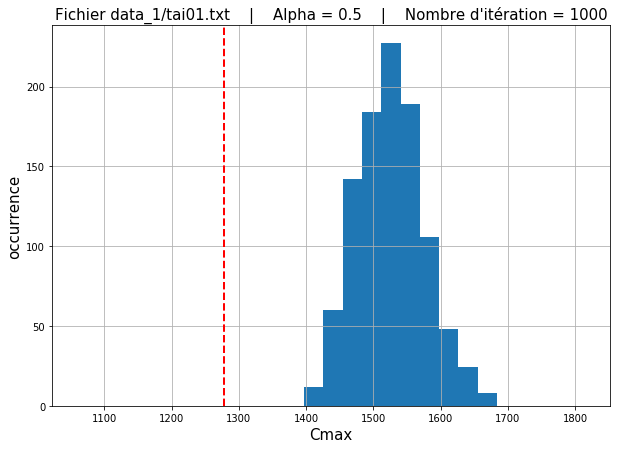

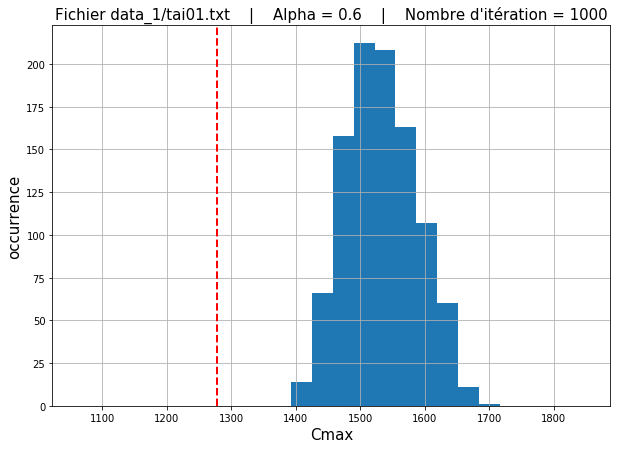

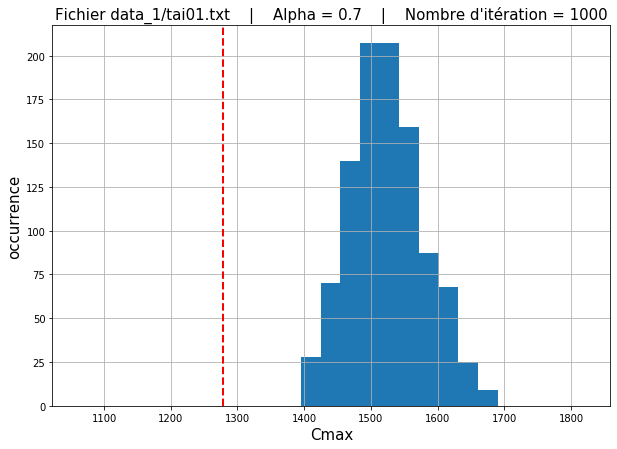

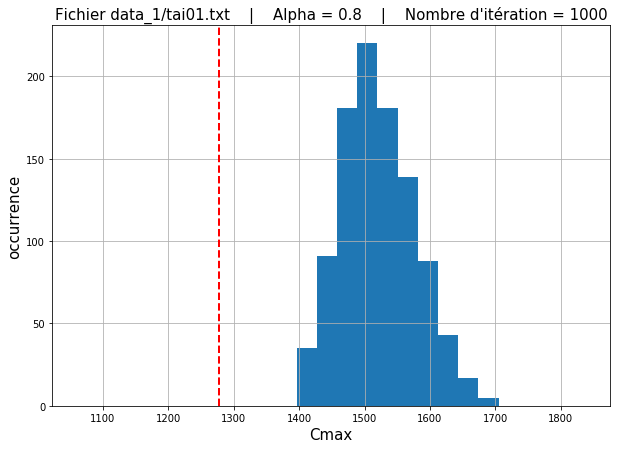

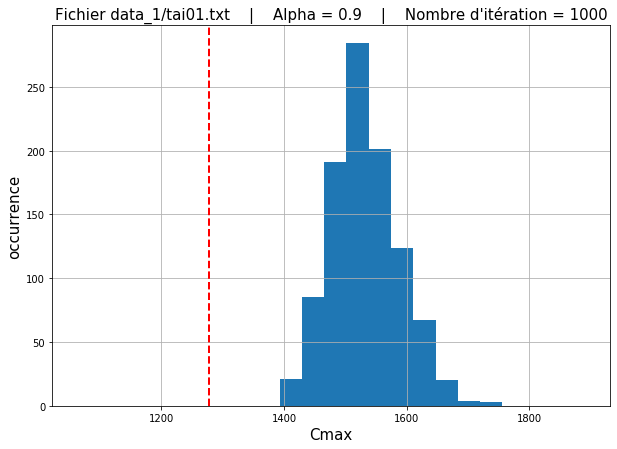

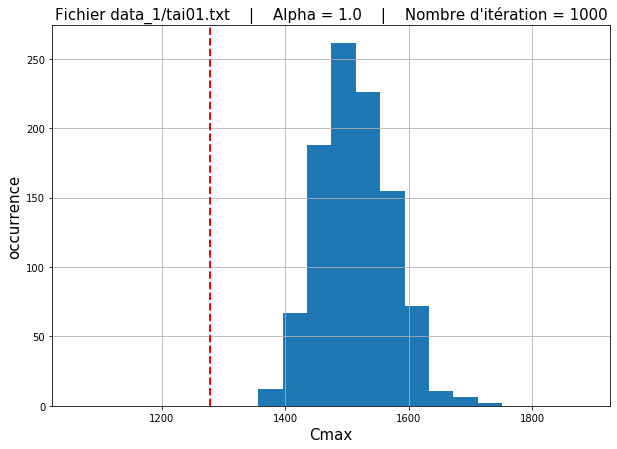

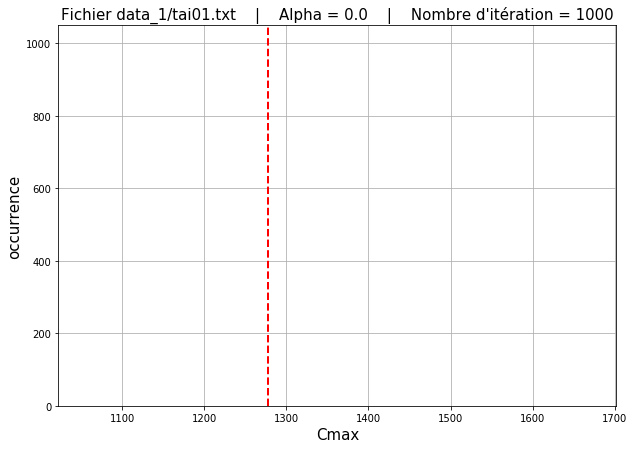

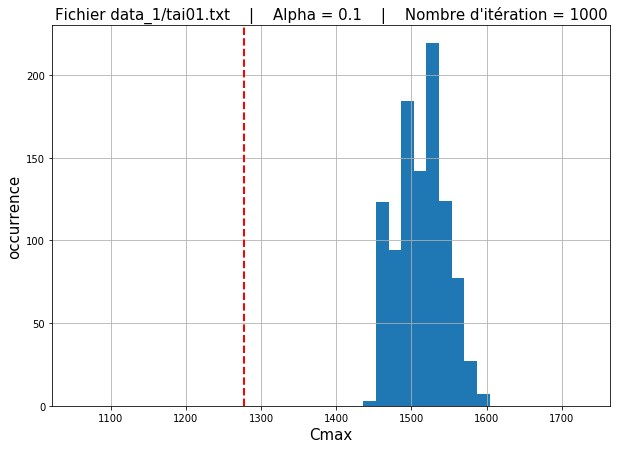

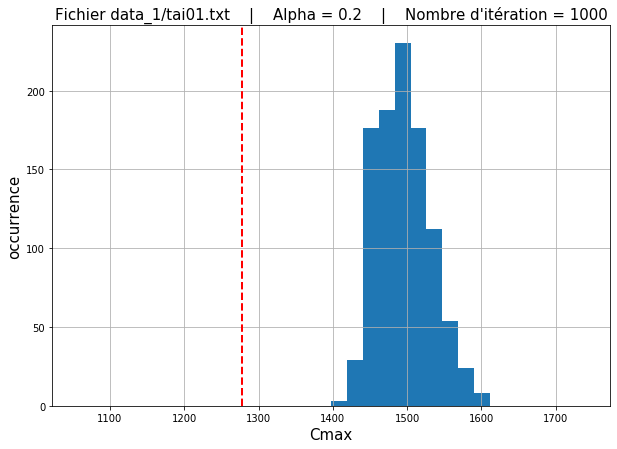

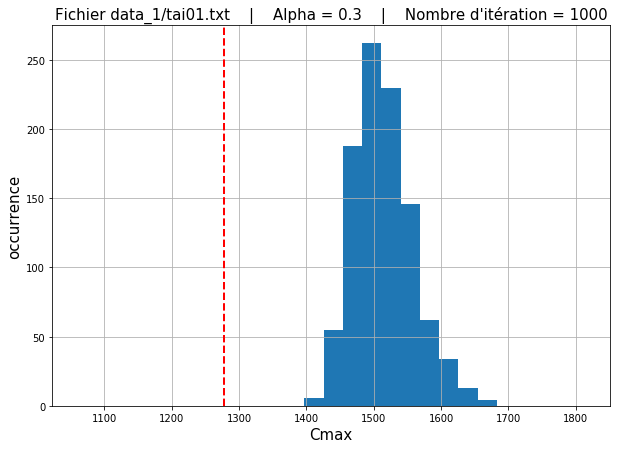

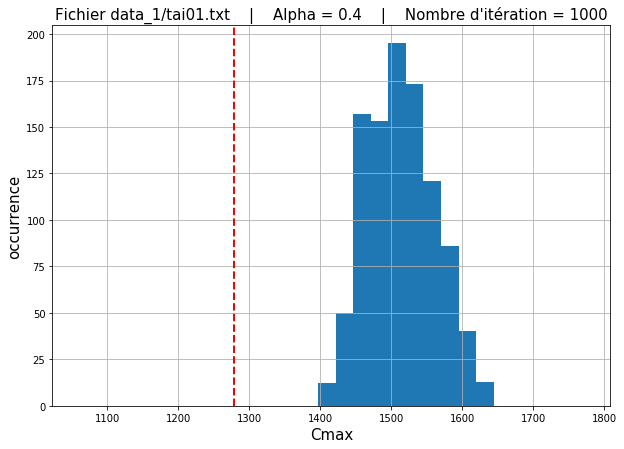

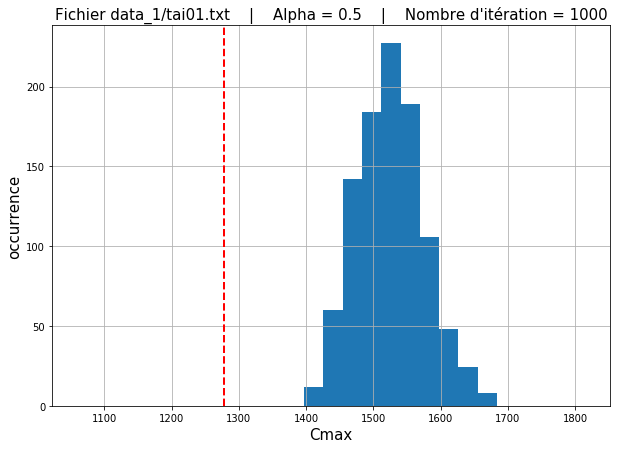

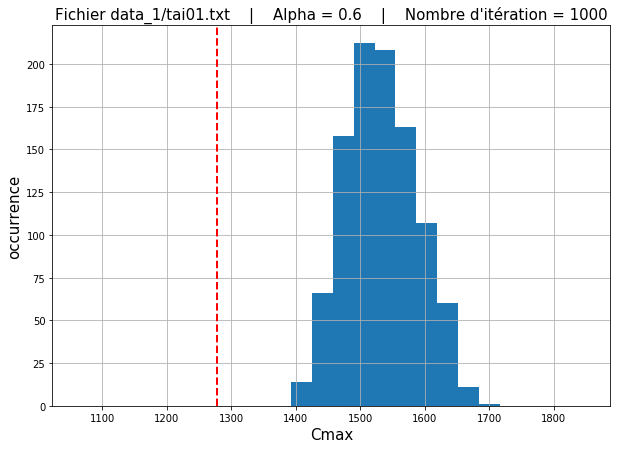

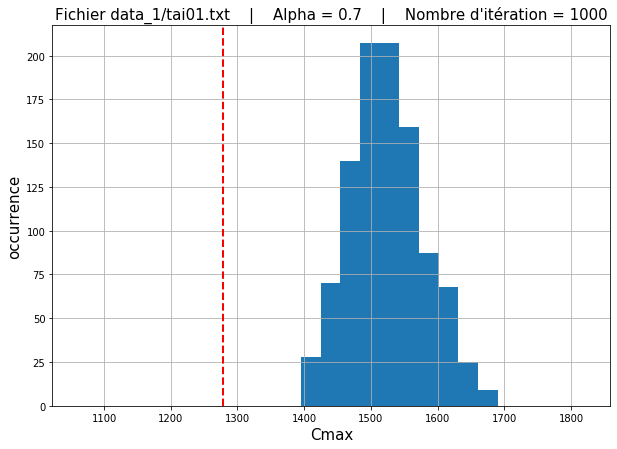

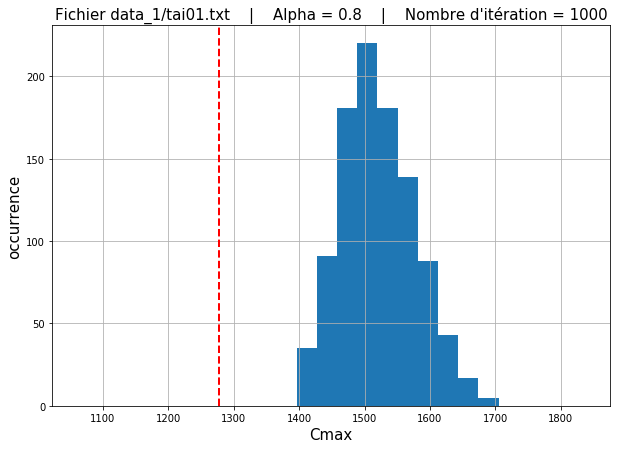

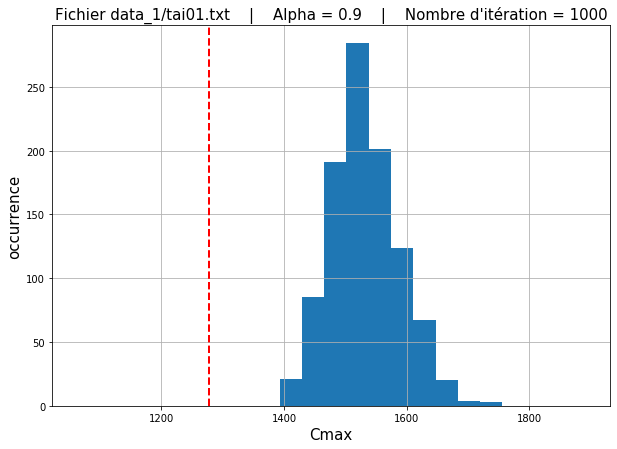

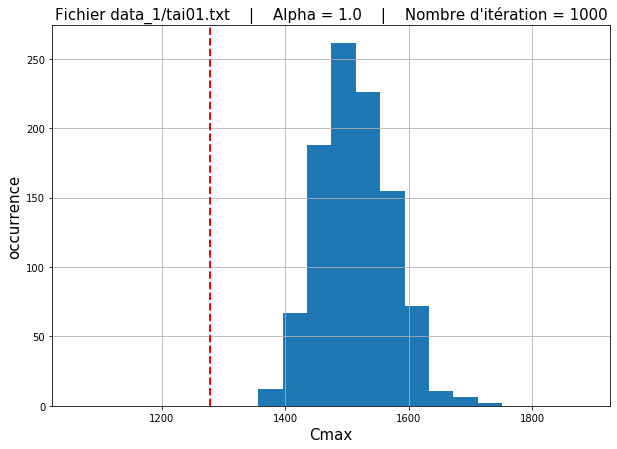

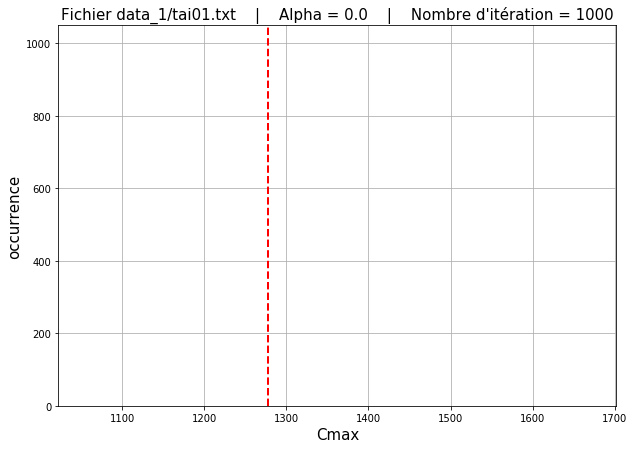

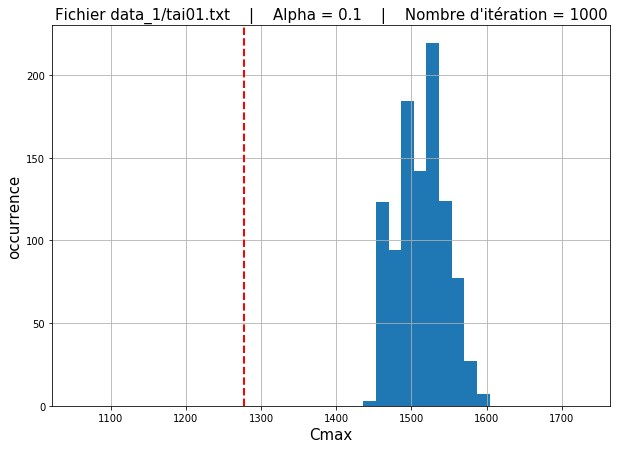

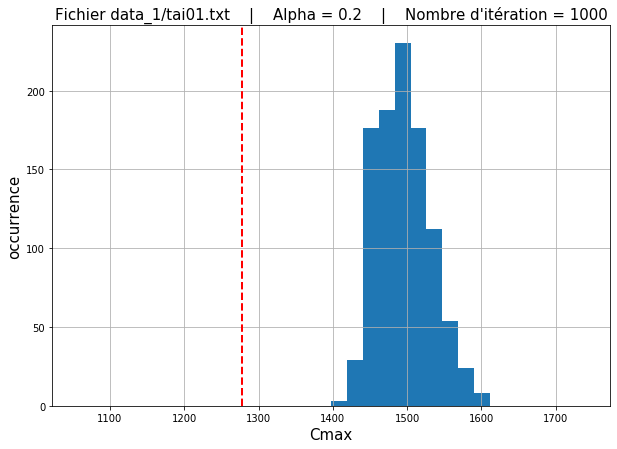

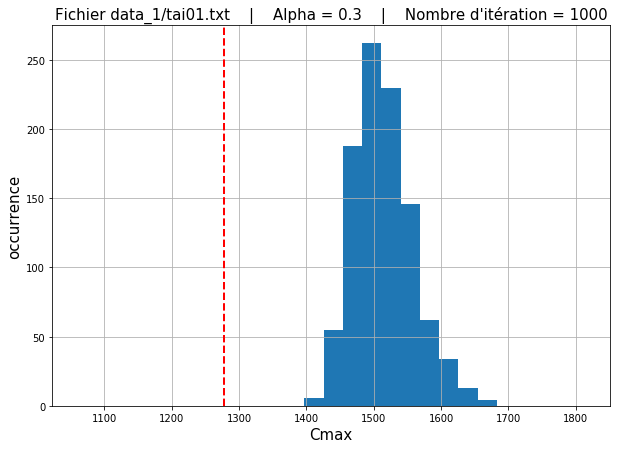

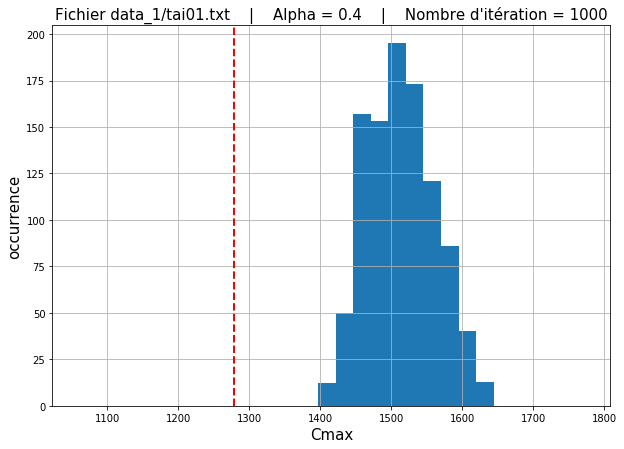

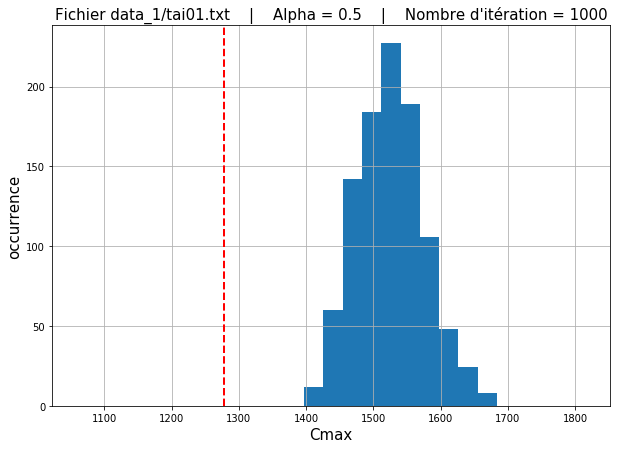

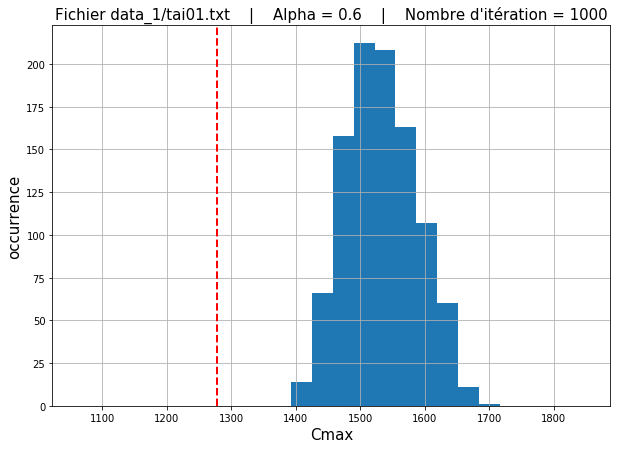

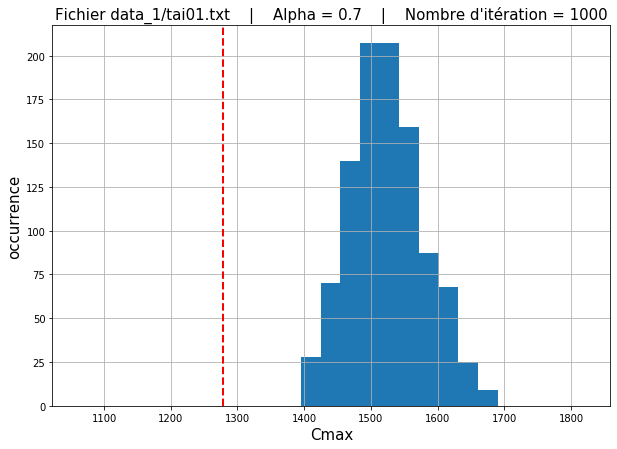

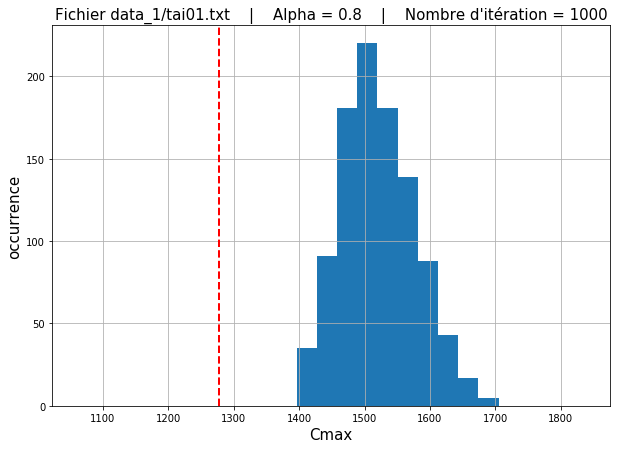

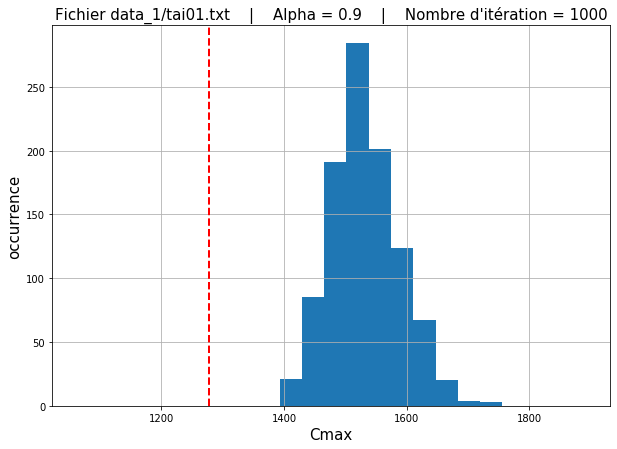

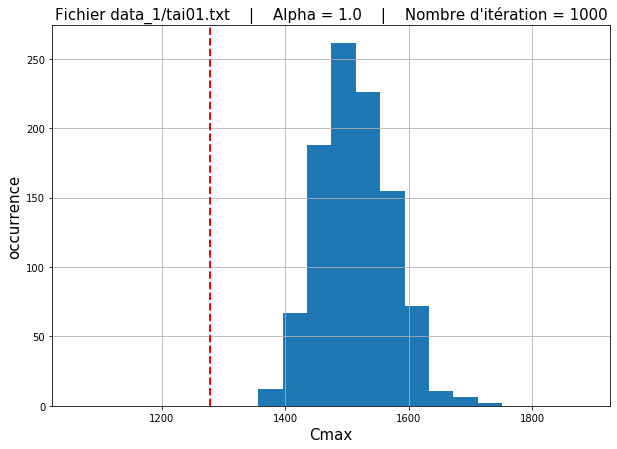

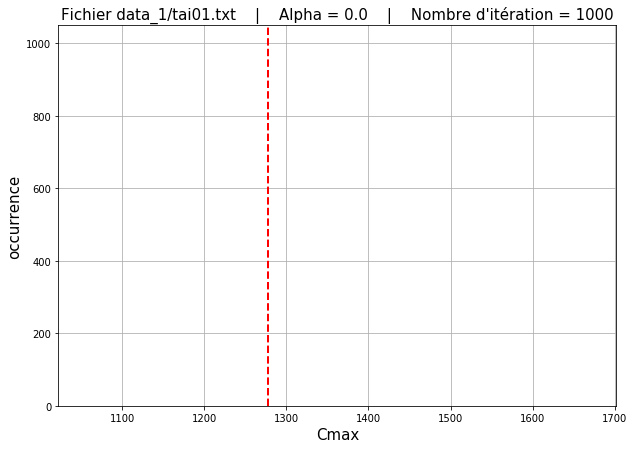

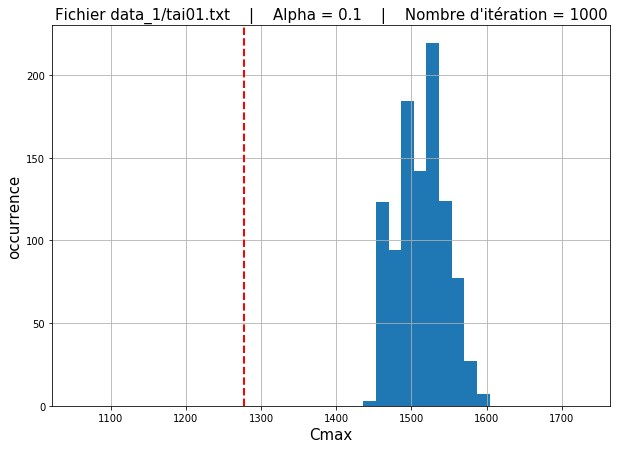

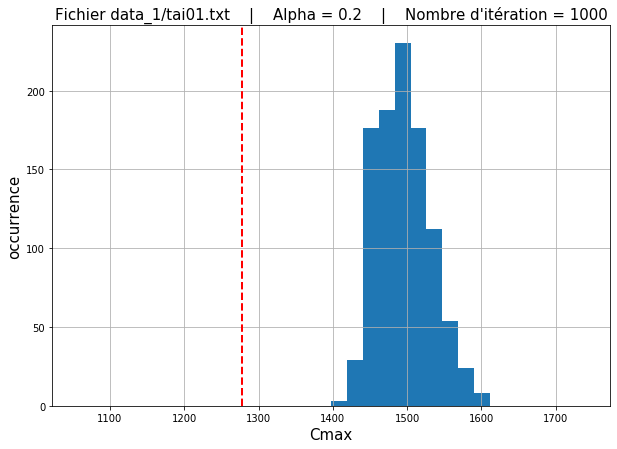

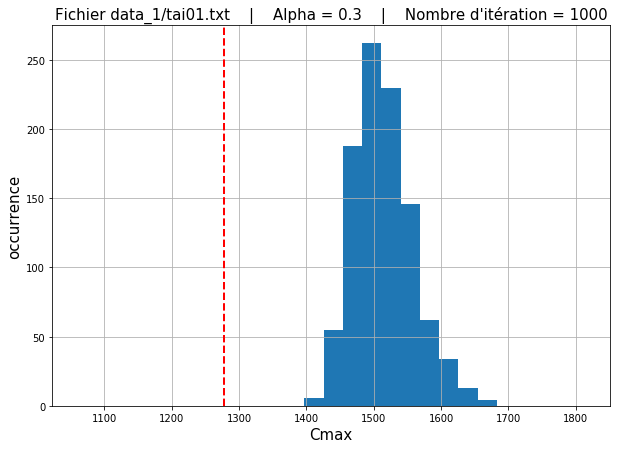

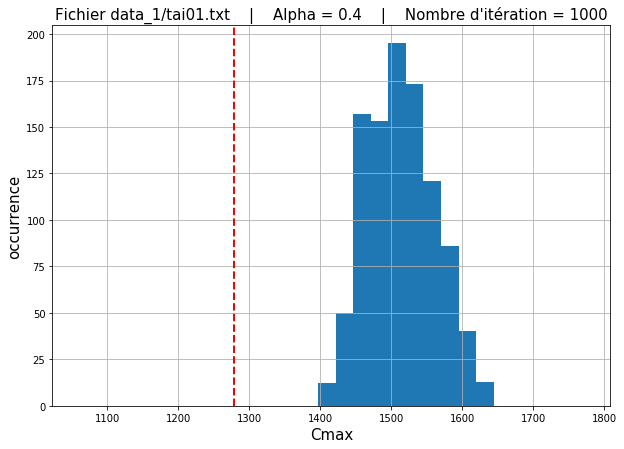

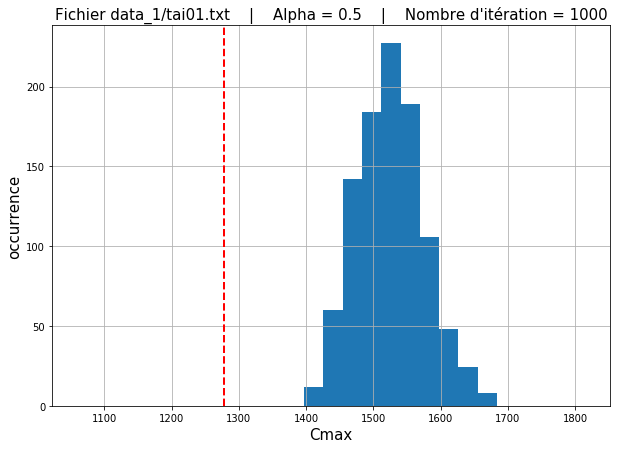

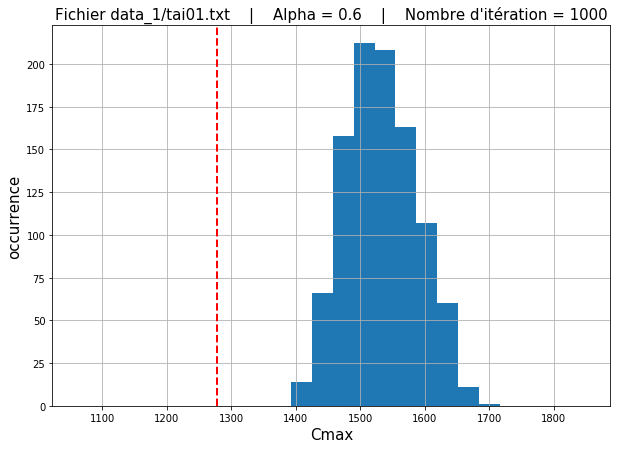

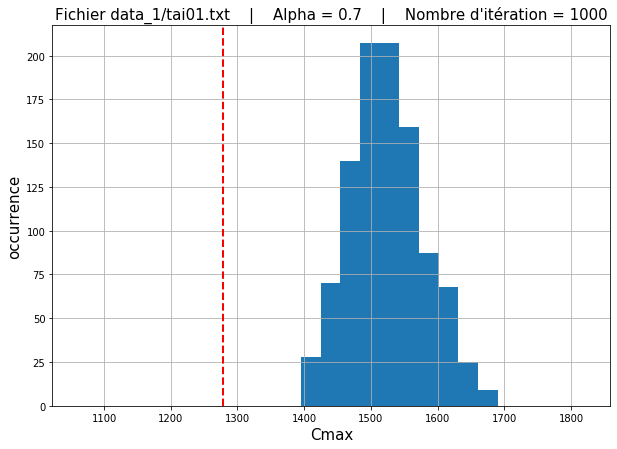

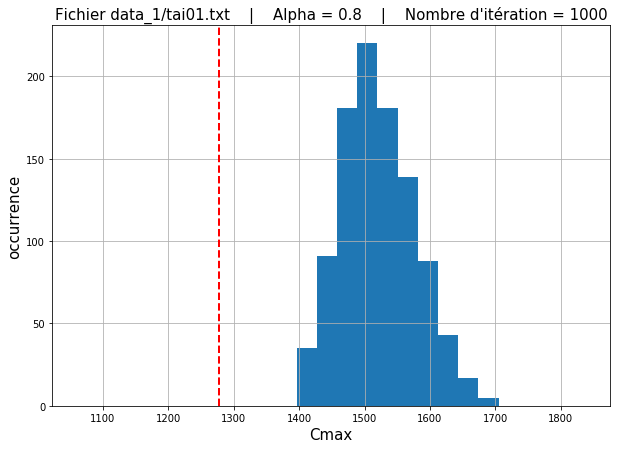

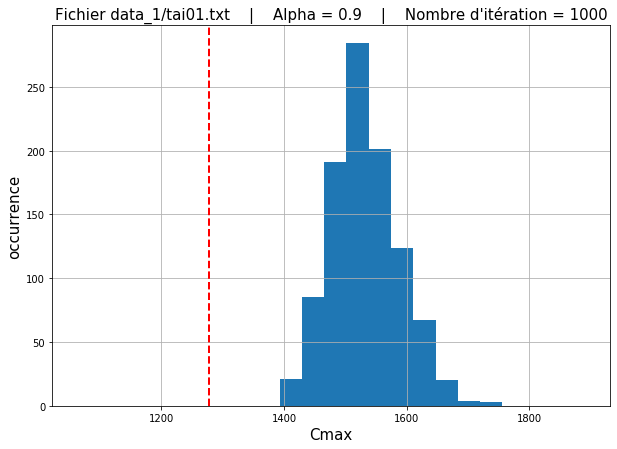

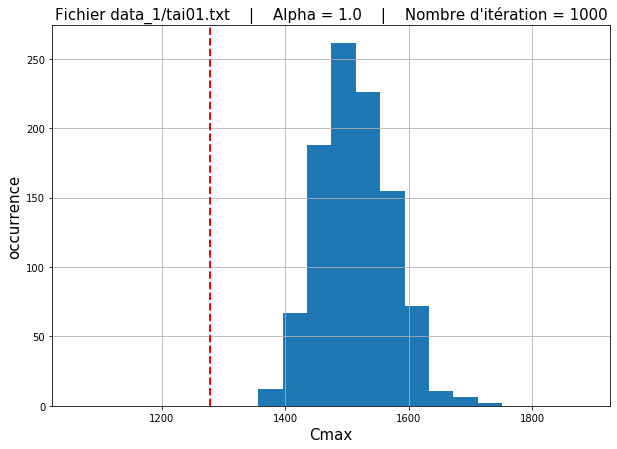

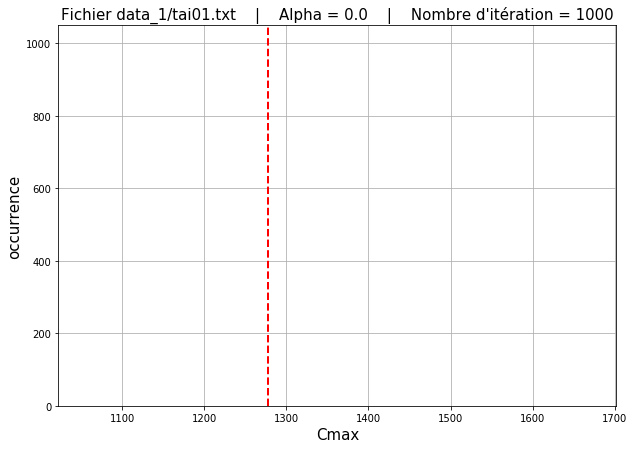

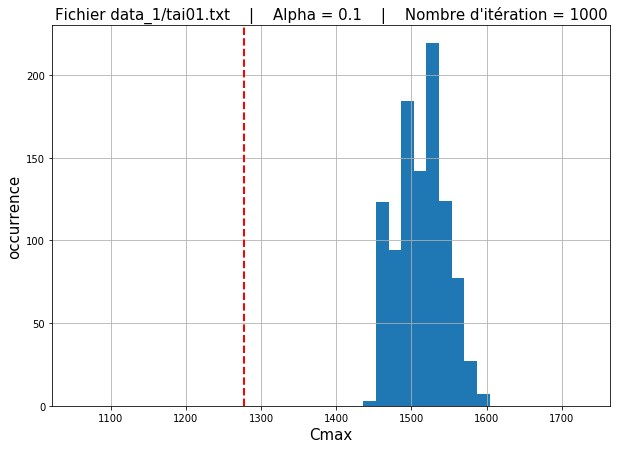

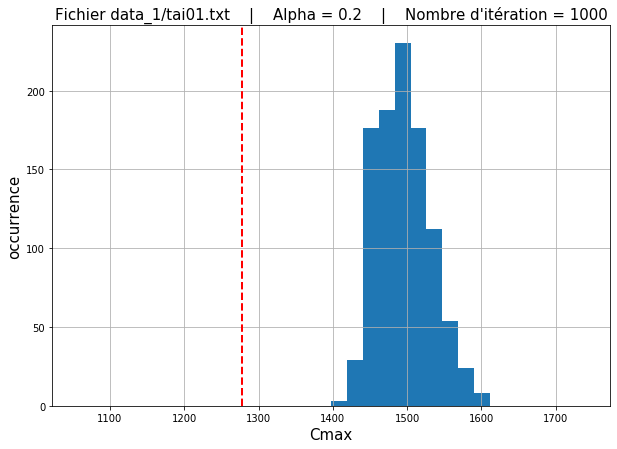

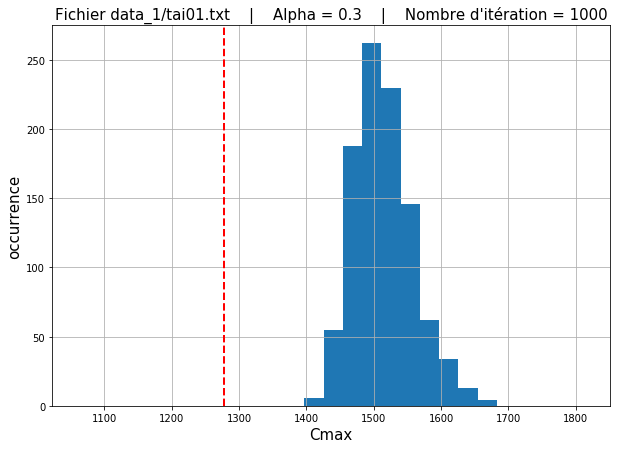

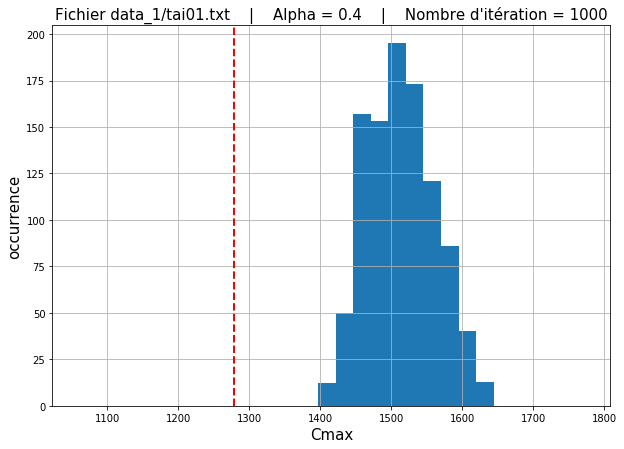

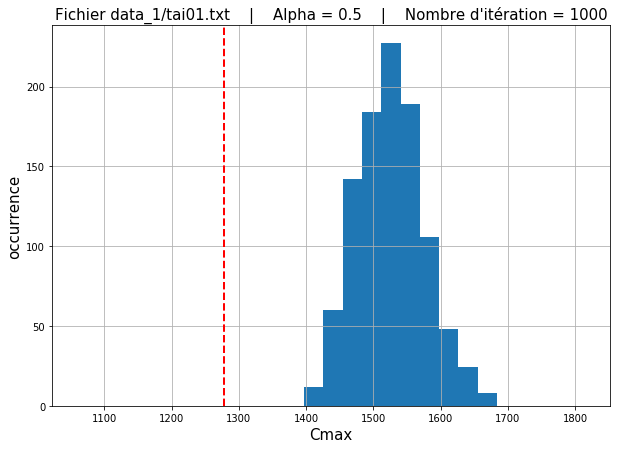

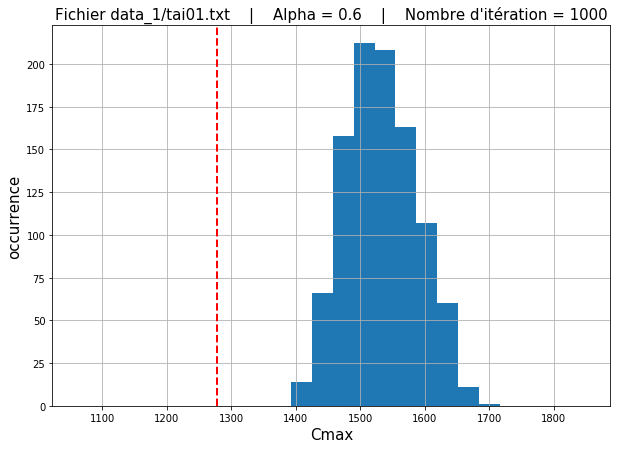

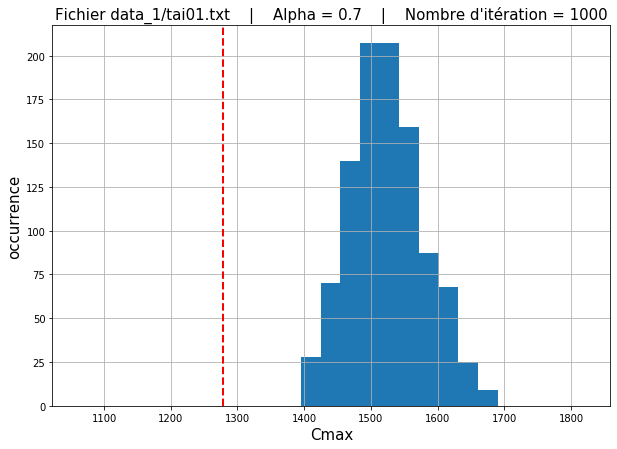

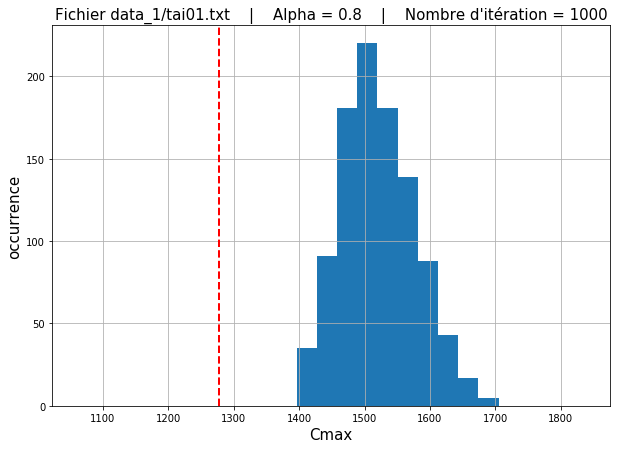

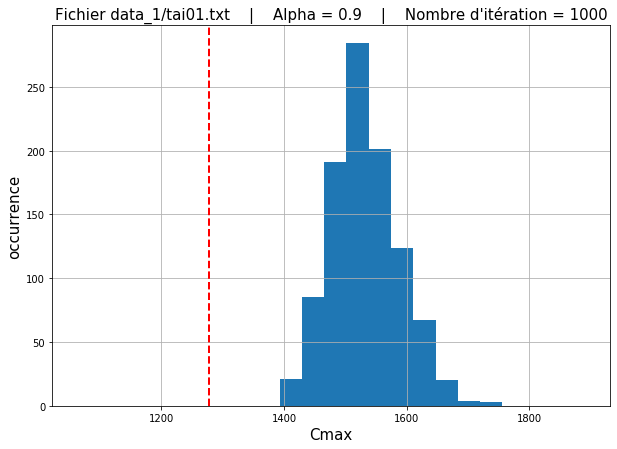

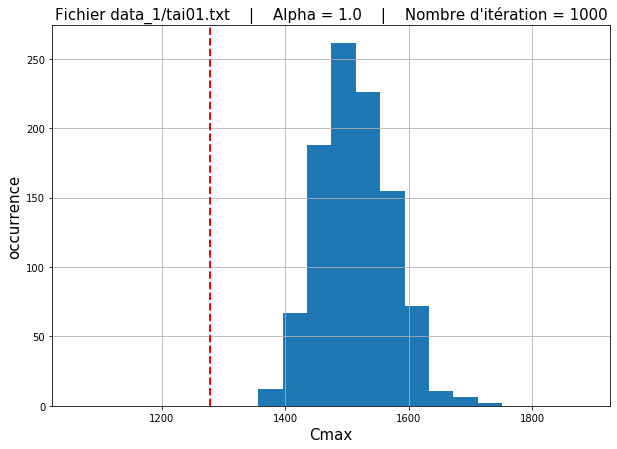

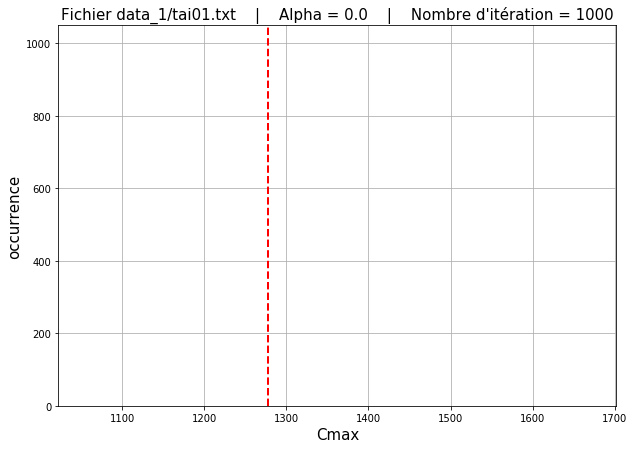

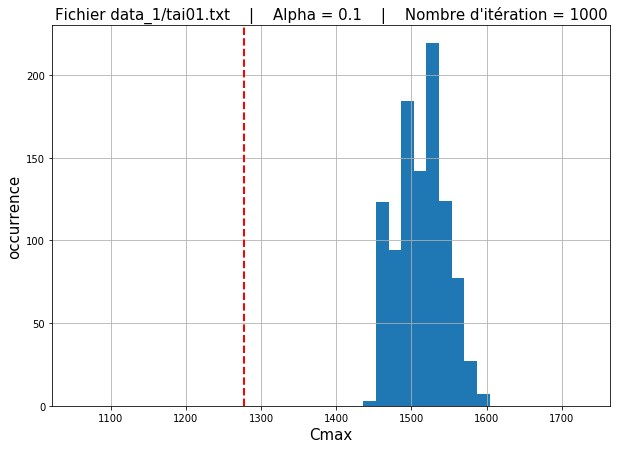

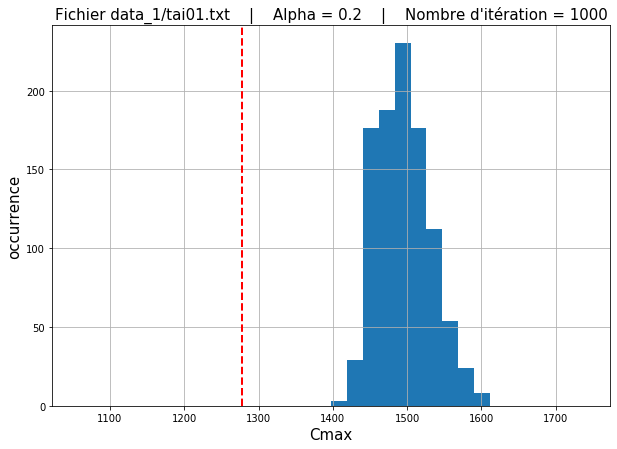

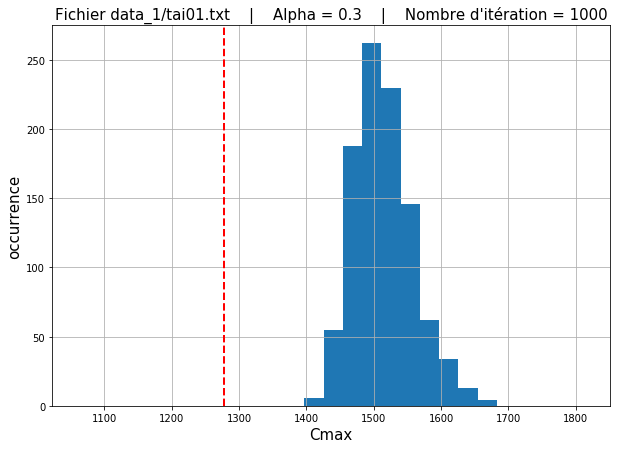

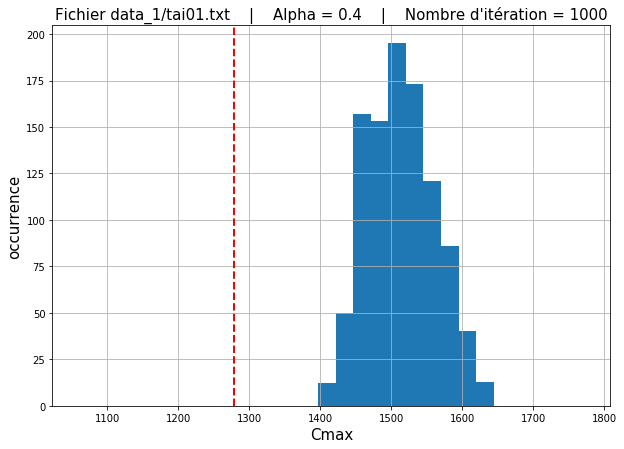

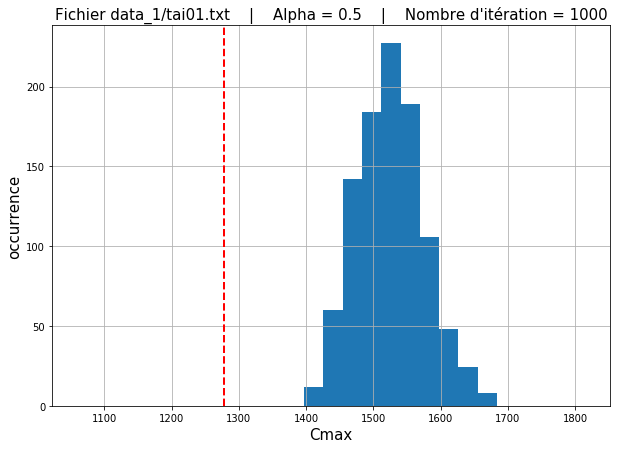

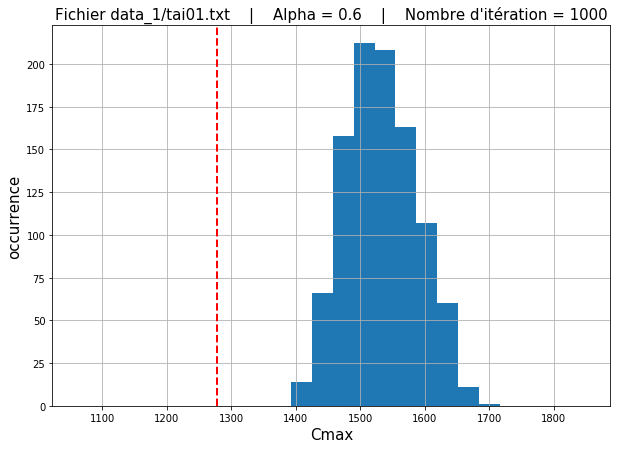

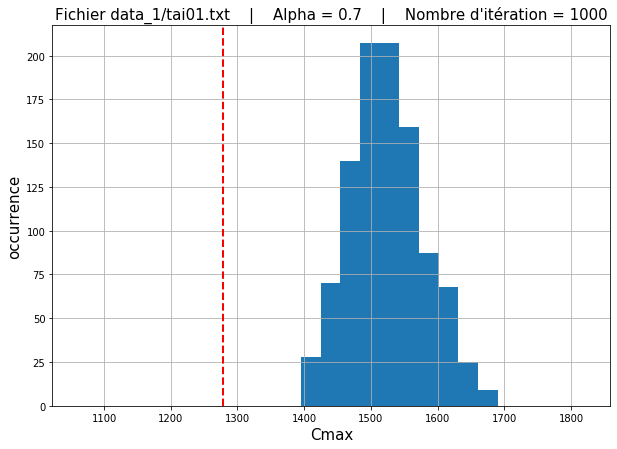

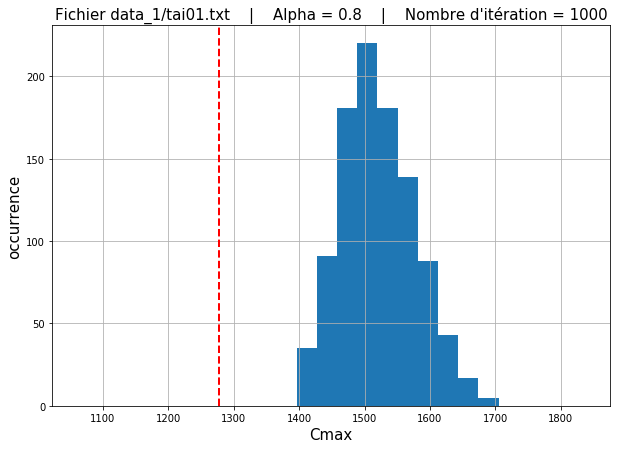

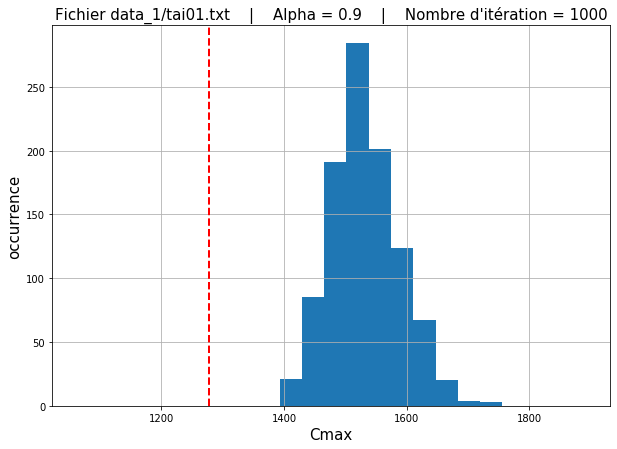

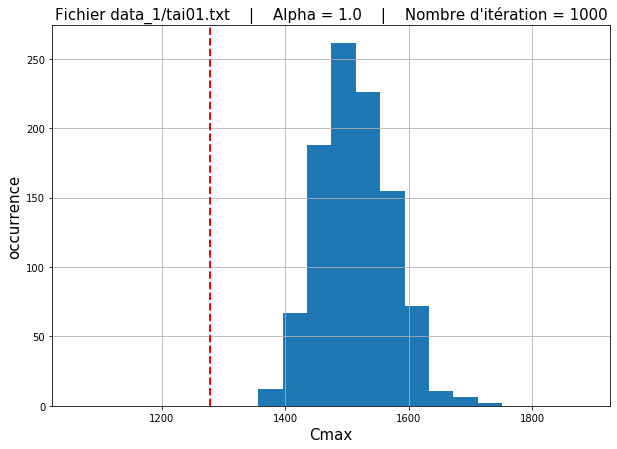

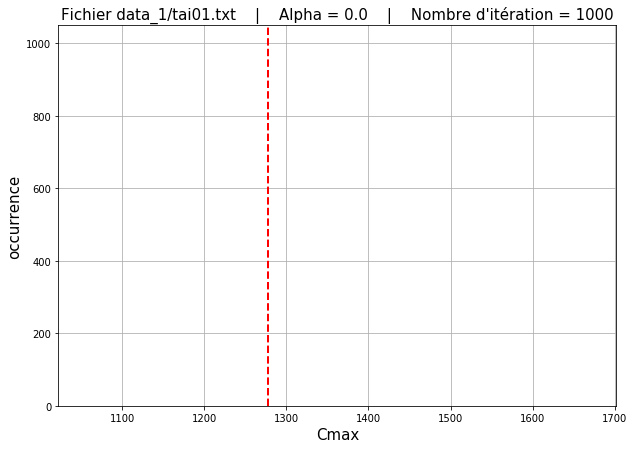

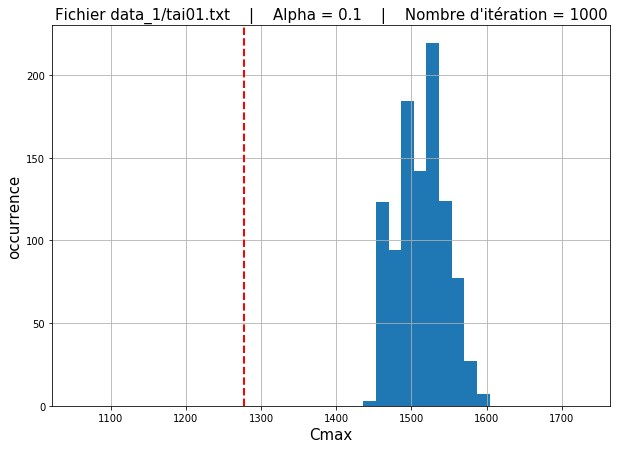

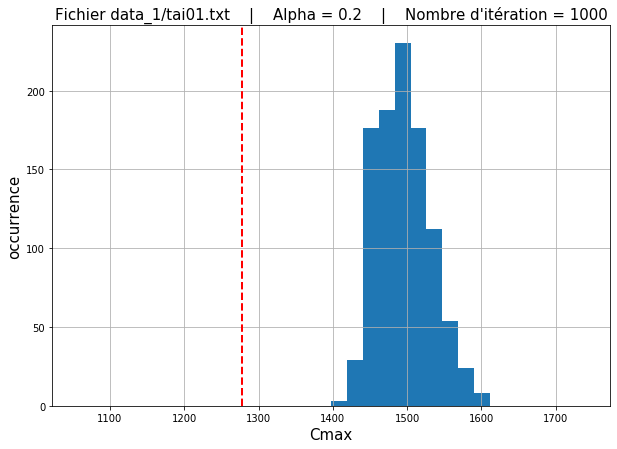

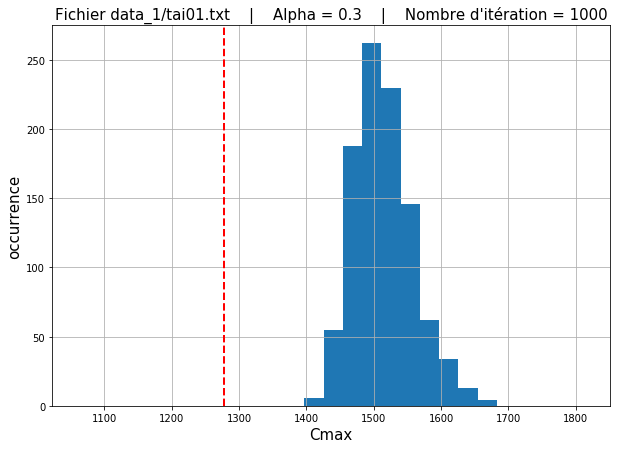

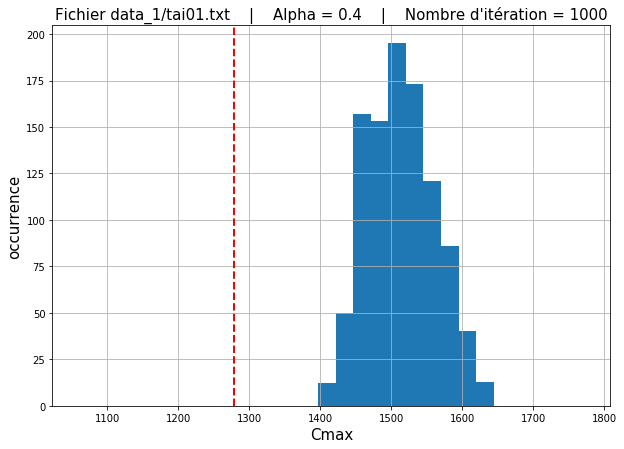

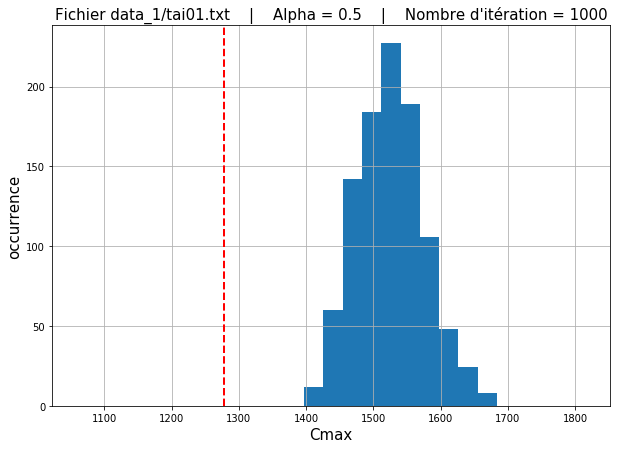

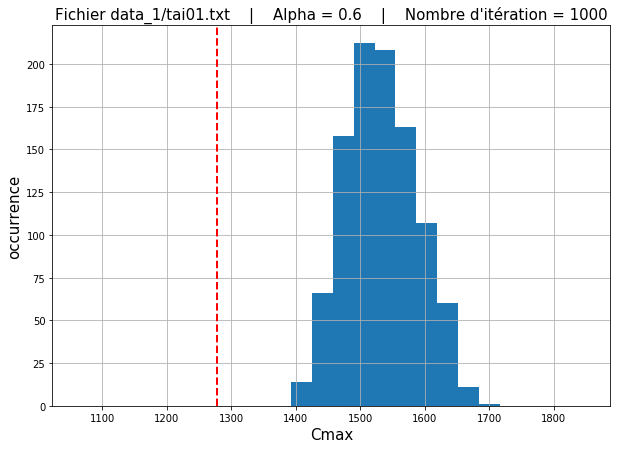

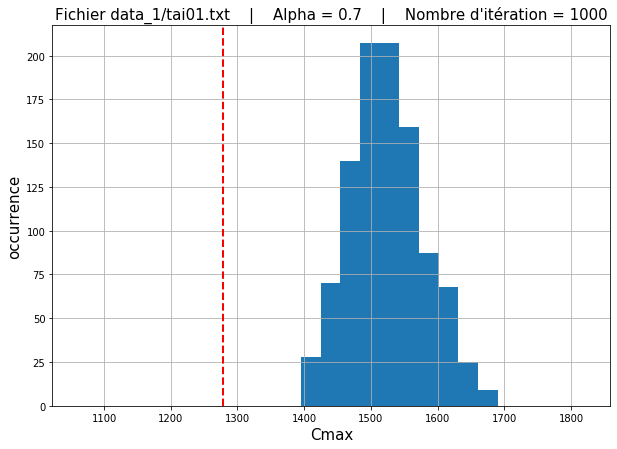

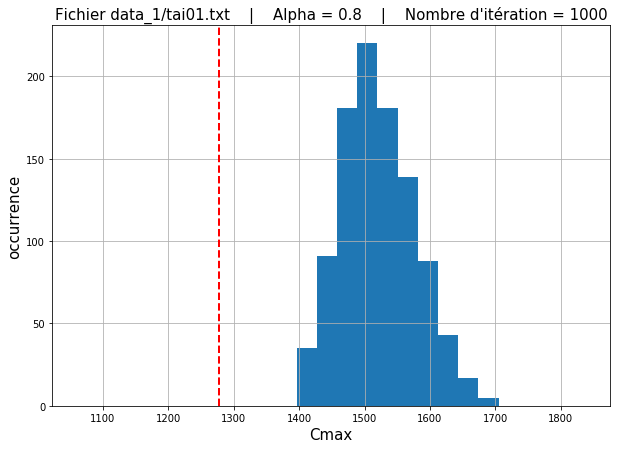

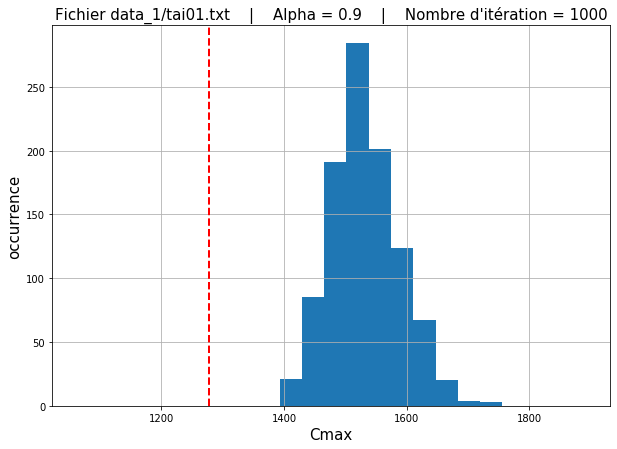

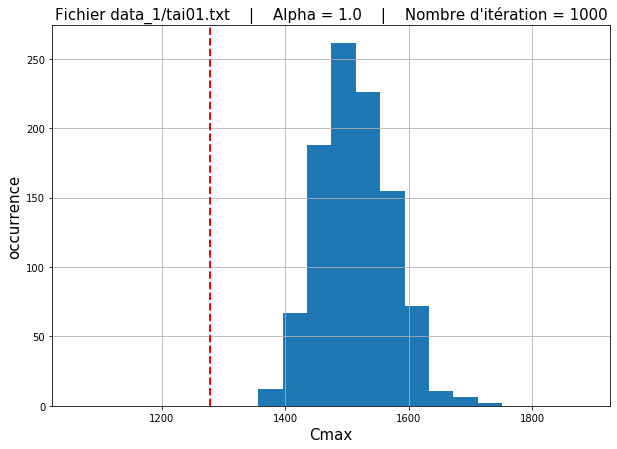

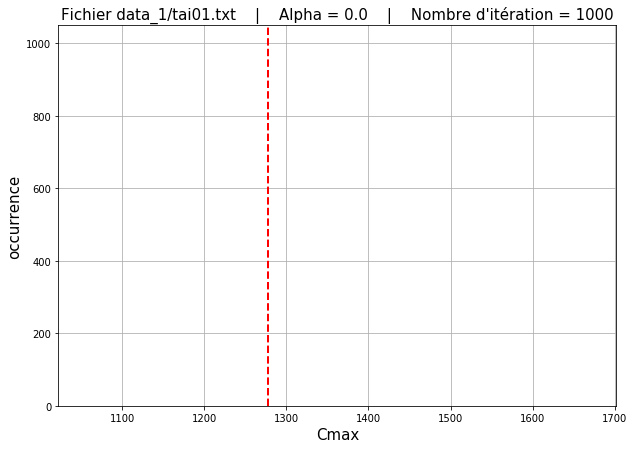

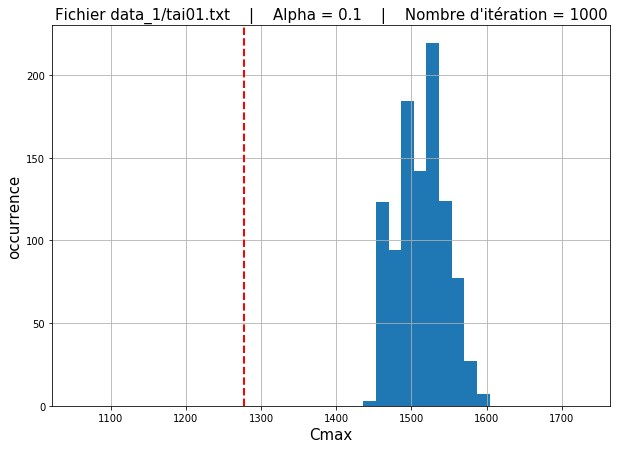

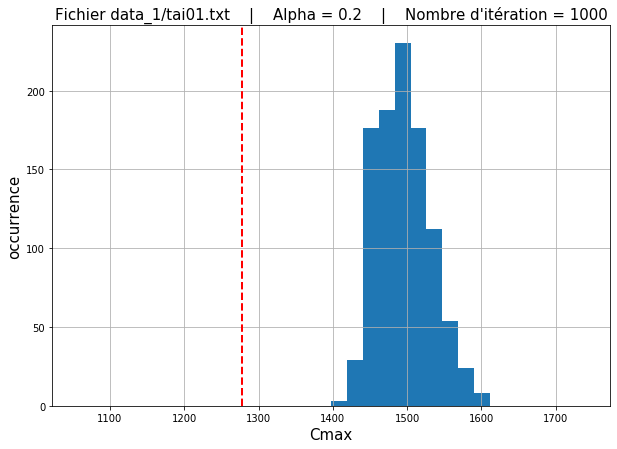

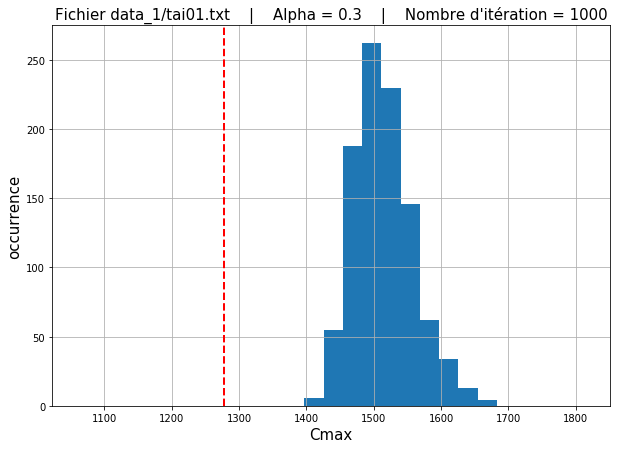

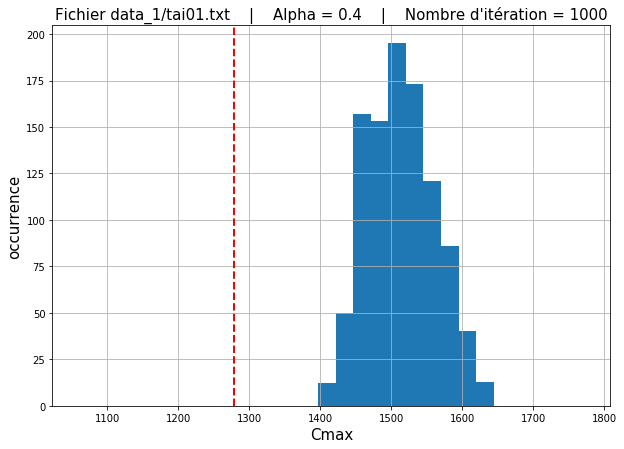

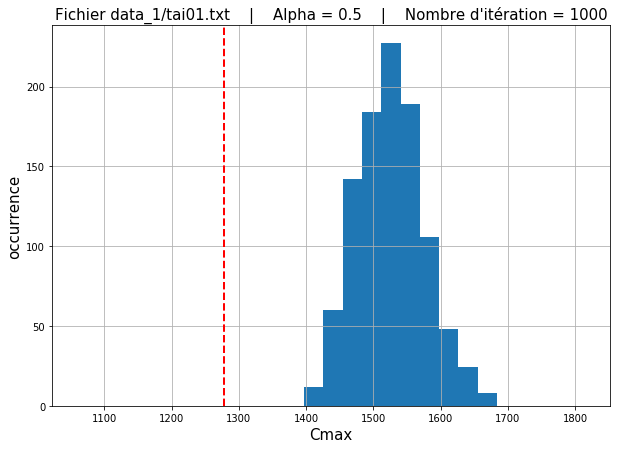

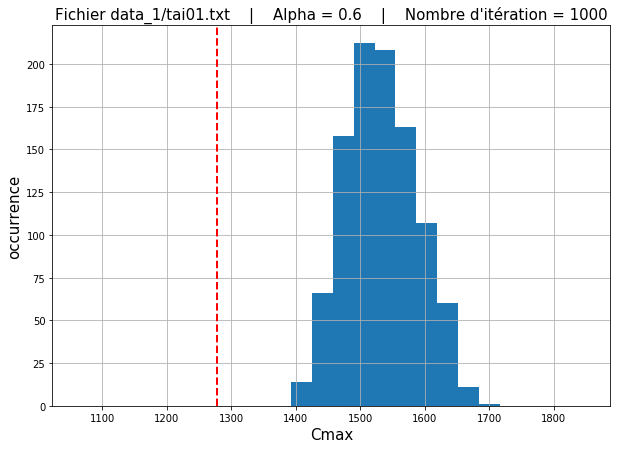

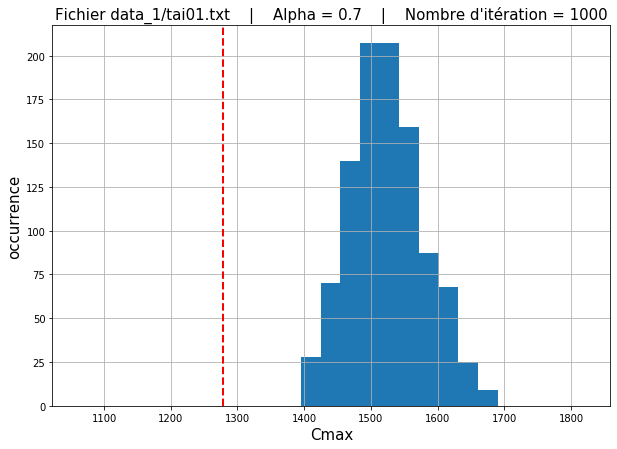

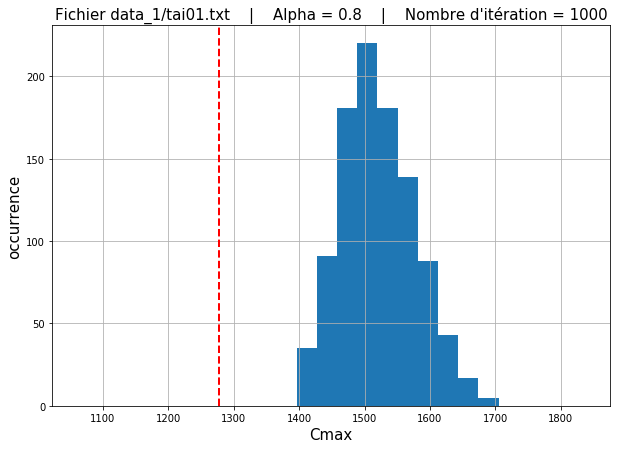

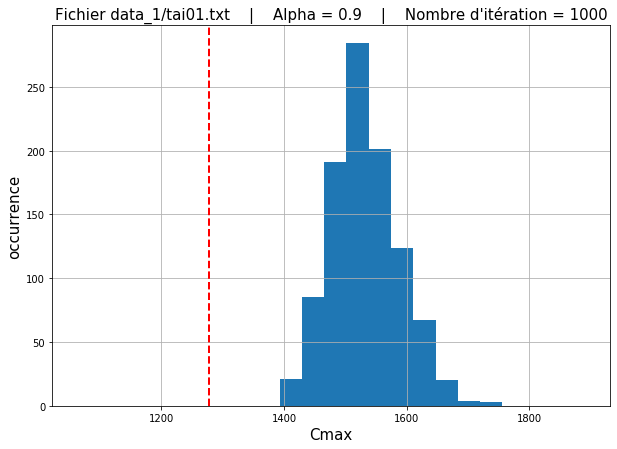

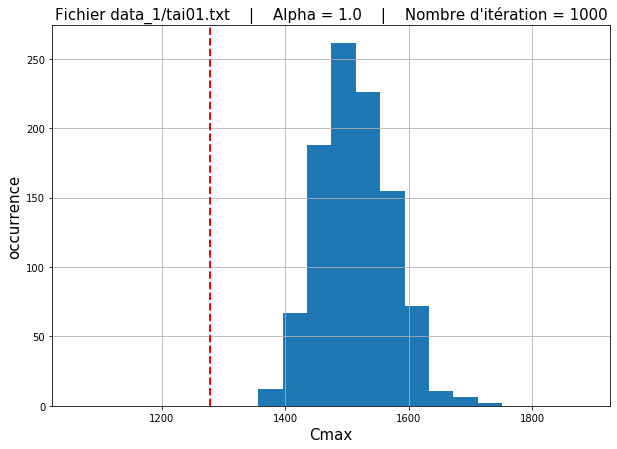

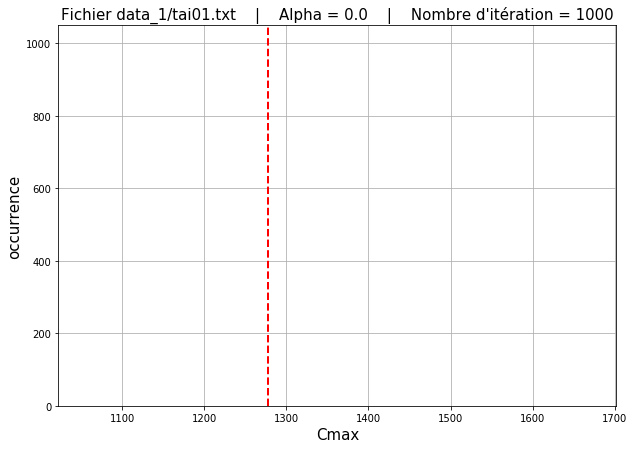

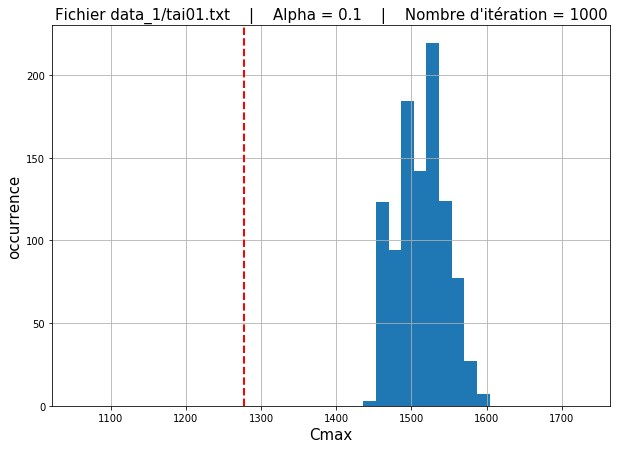

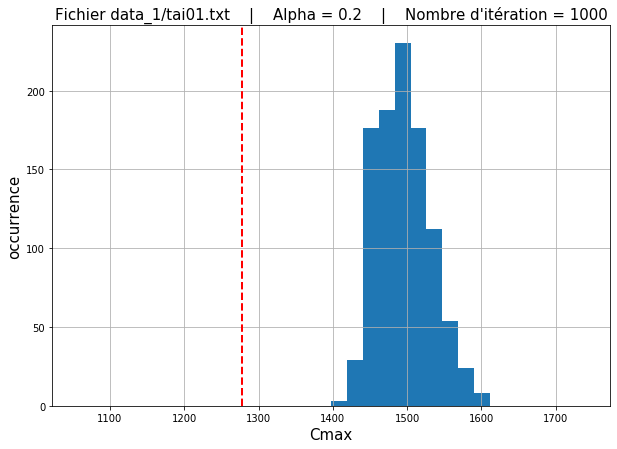

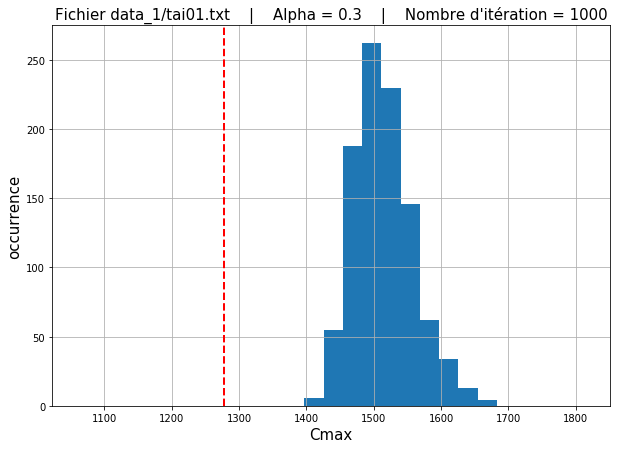

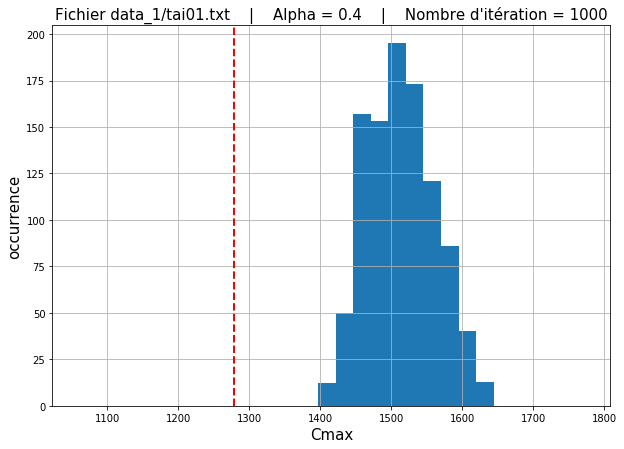

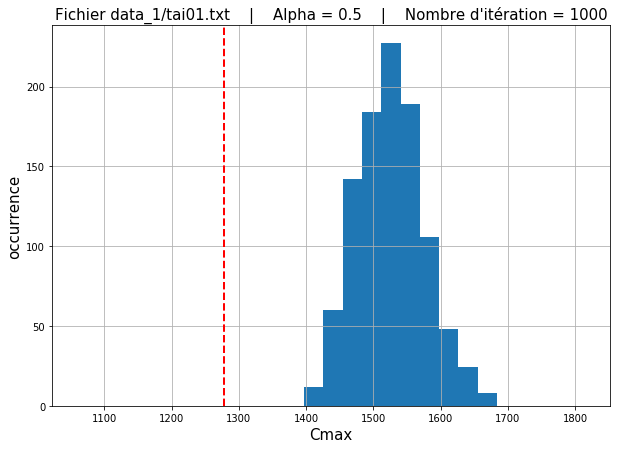

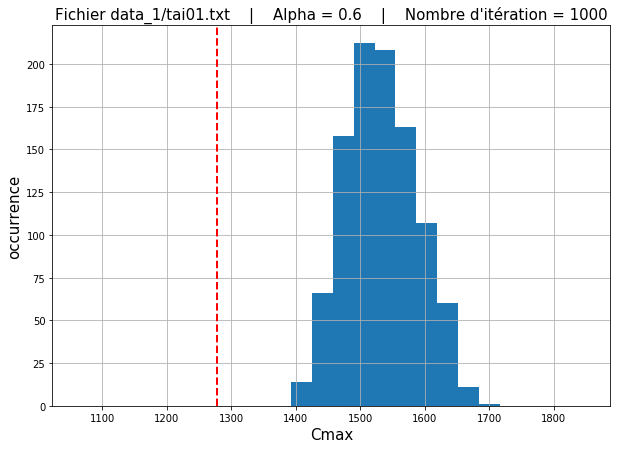

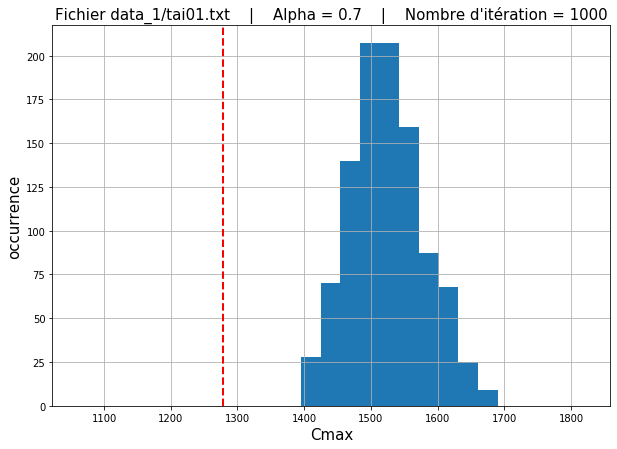

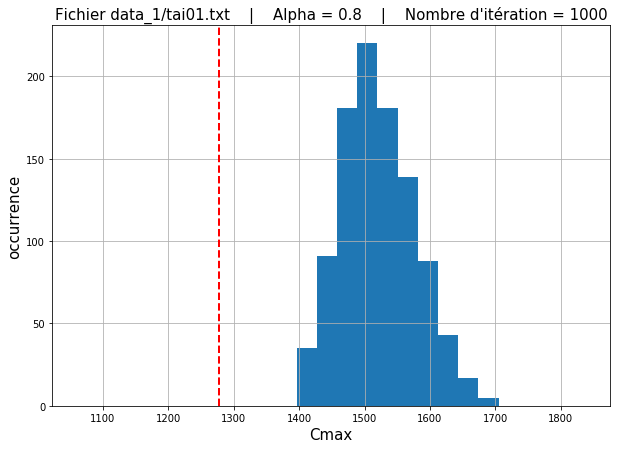

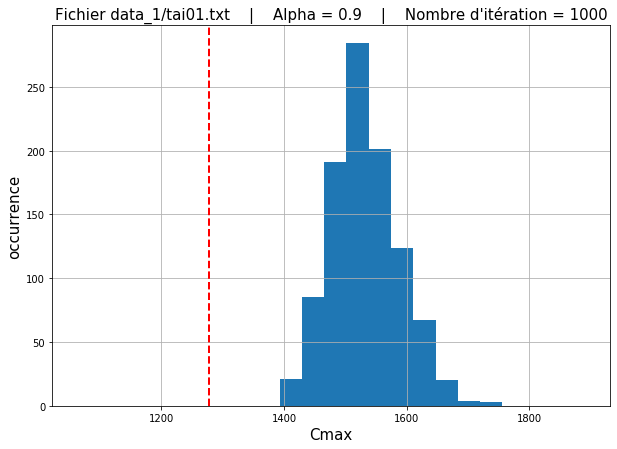

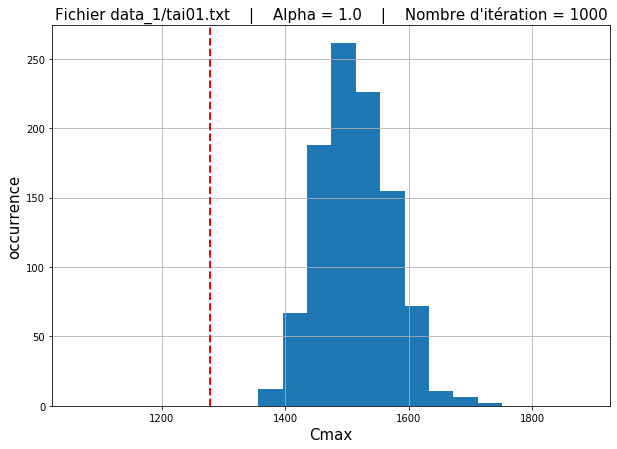

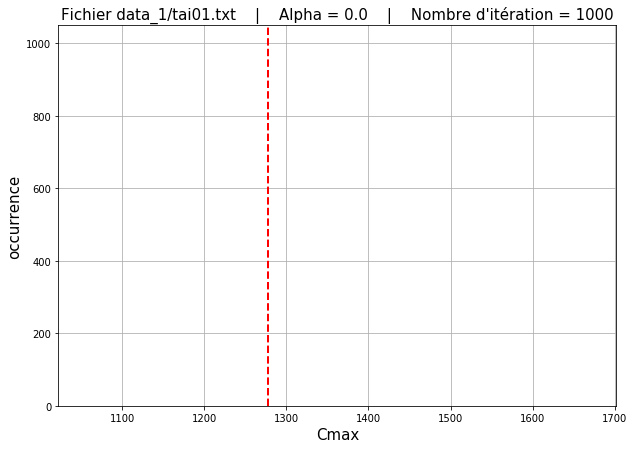

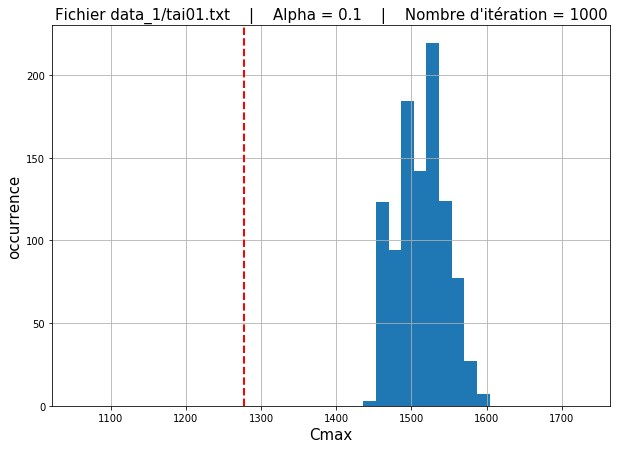

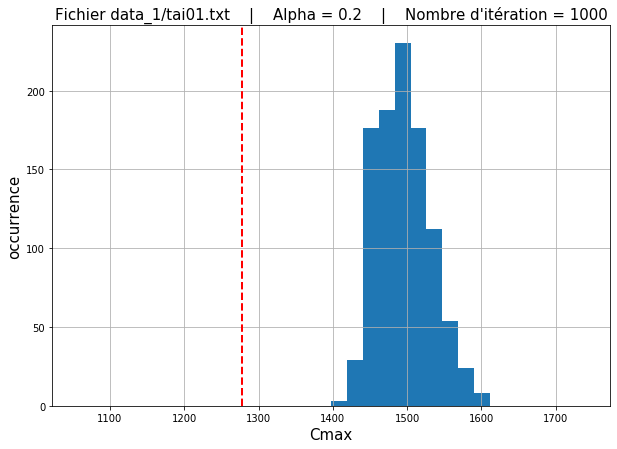

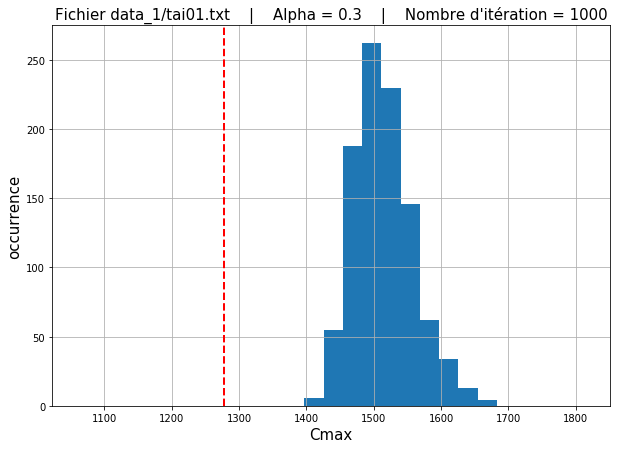

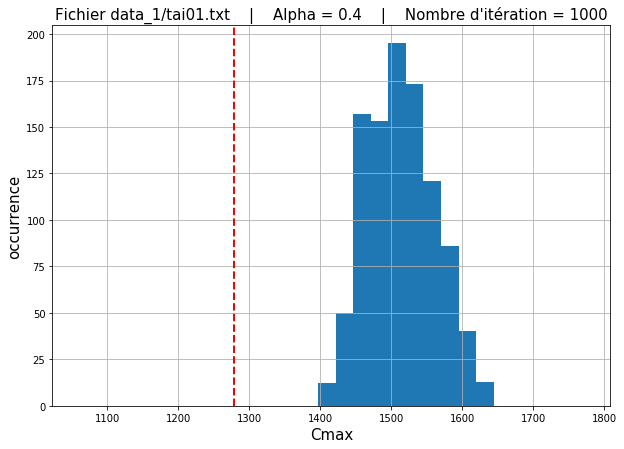

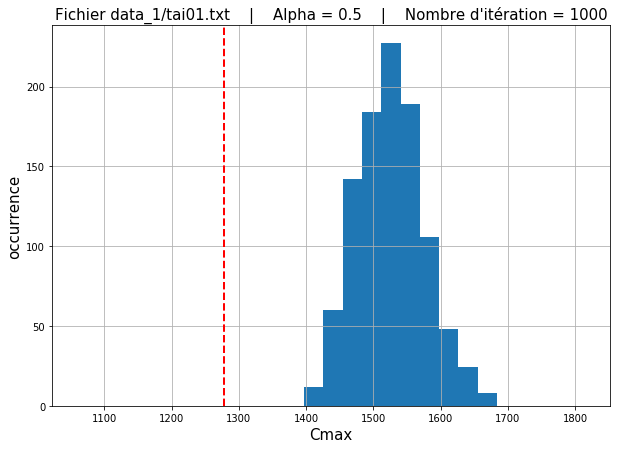

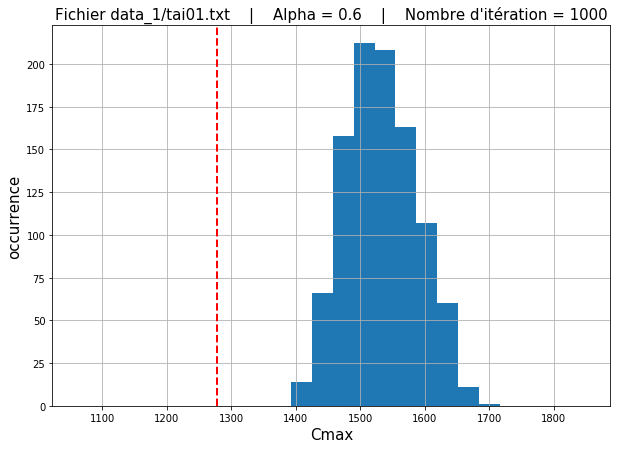

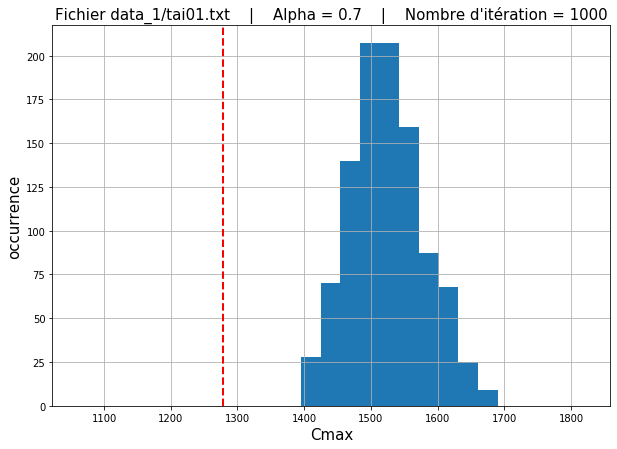

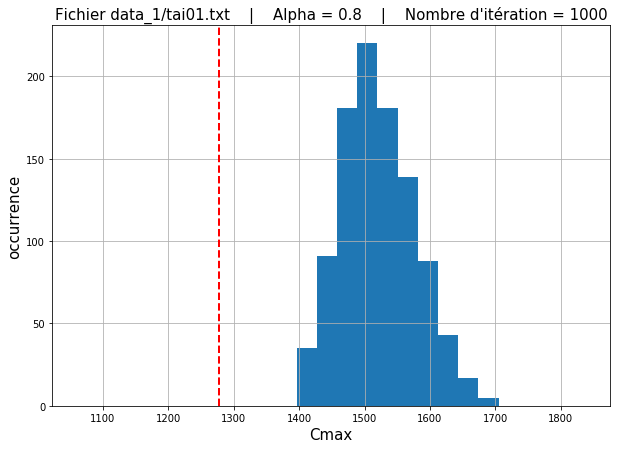

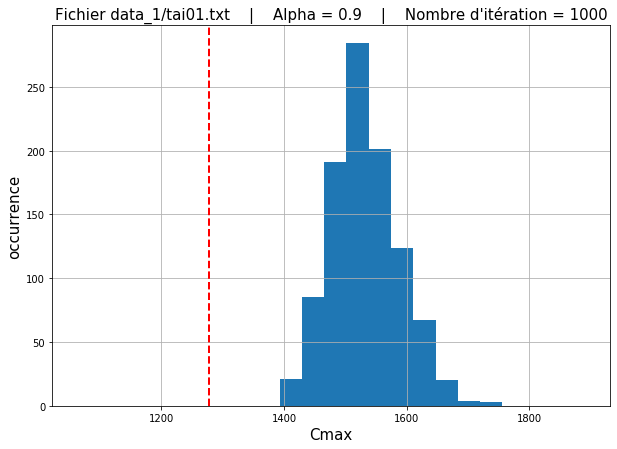

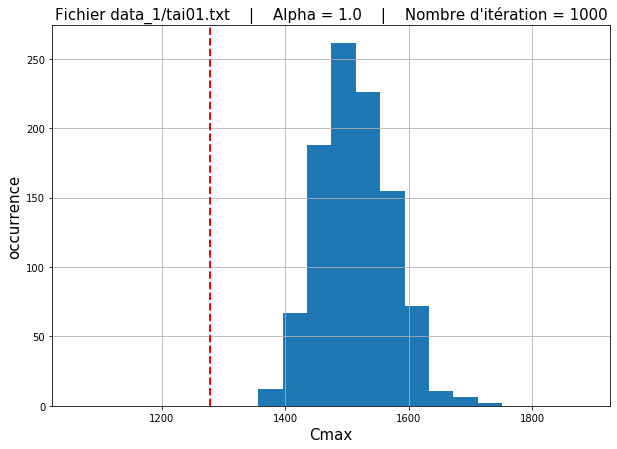

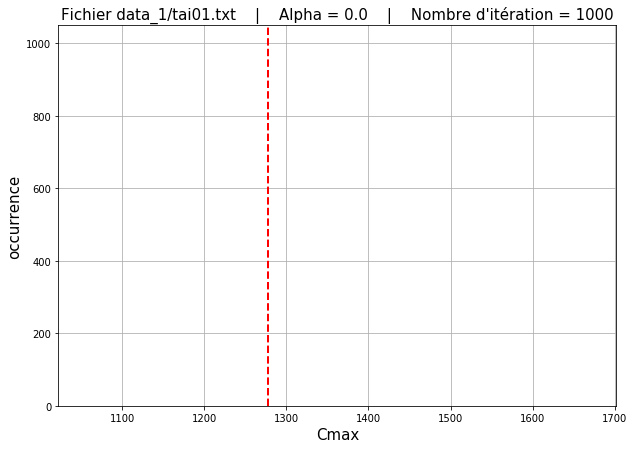

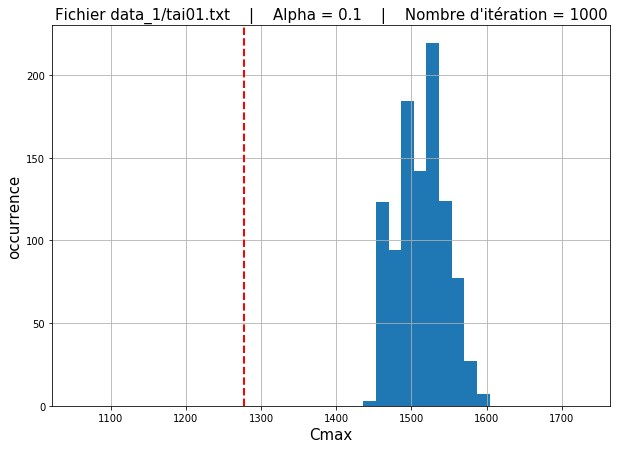

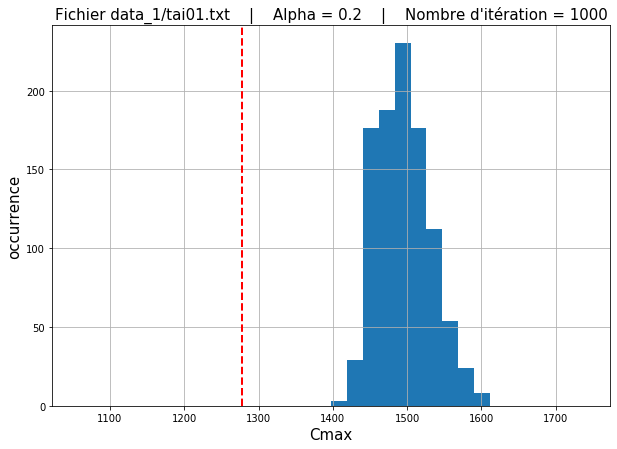

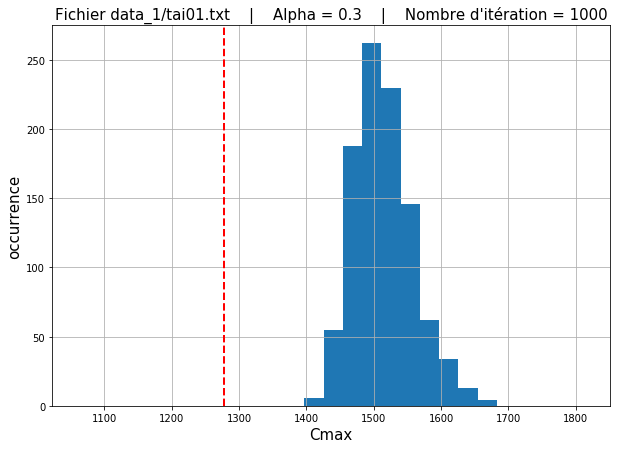

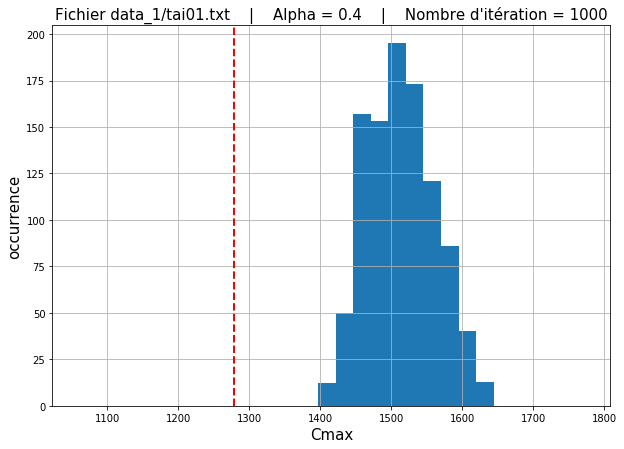

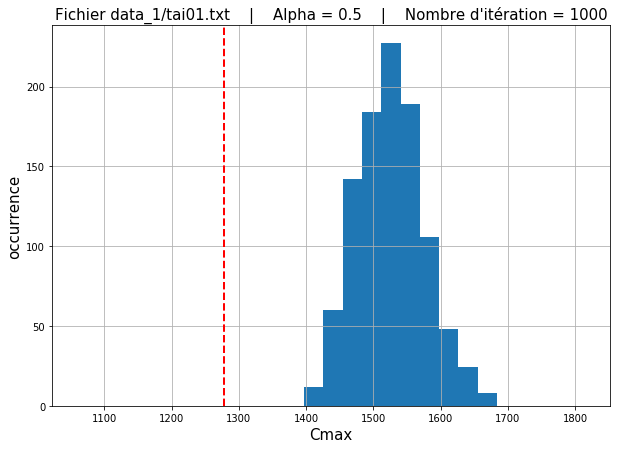

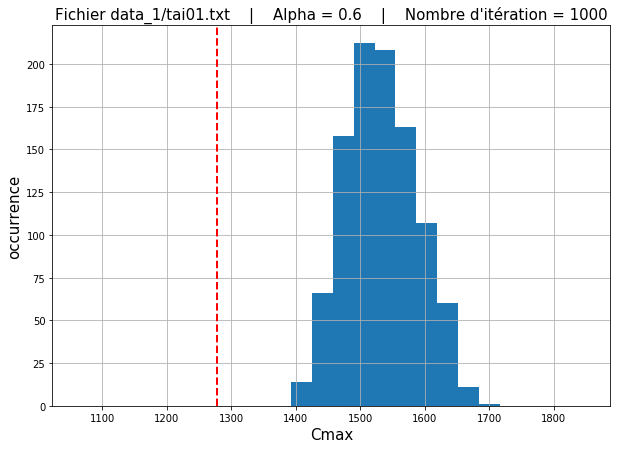

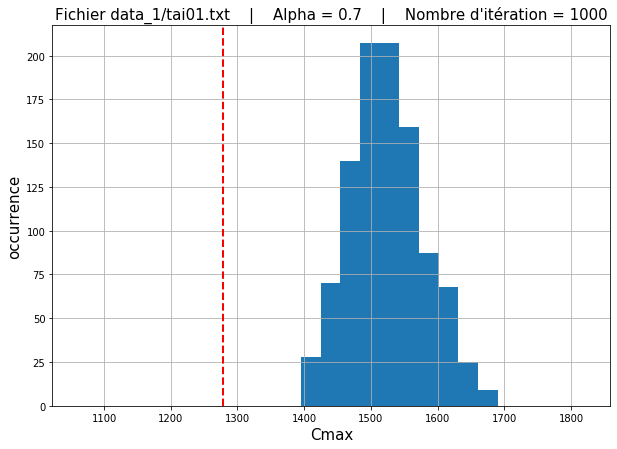

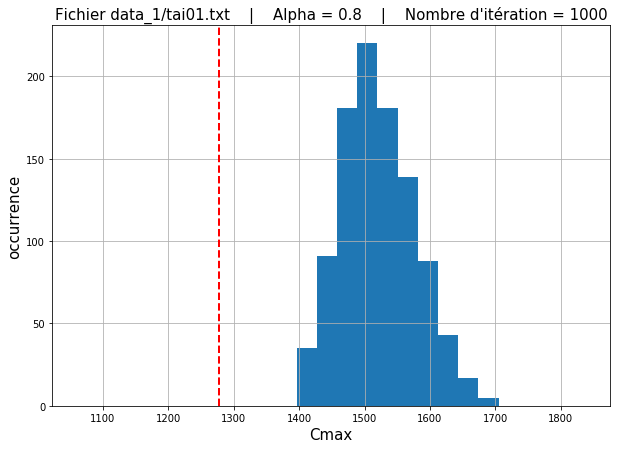

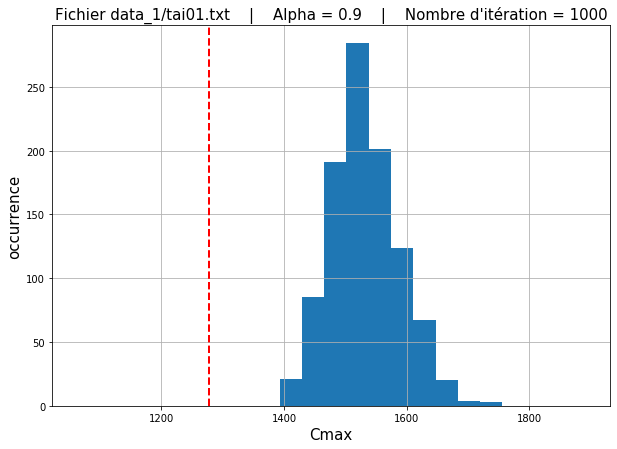

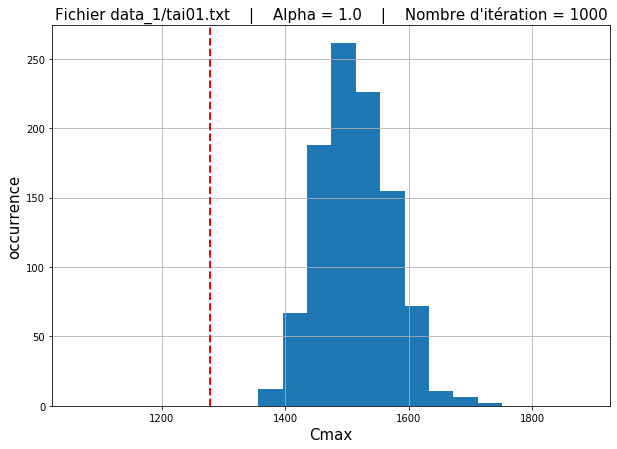

In [12]:
file= "data_1/tai01.txt"
for files in file:
    show_hist(file)